In [7]:
#%pip install -r requirements.txt

In [78]:
import numpy as np
import pandas as pd
import ast 
import matplotlib.pyplot as plt
import seaborn as sns
from src.util import utils
from src.util.utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [268]:
df = pd.read_csv('data/keystrokes-recipes-groups4.csv')
len(df)


1268

In [273]:
# Find first, second and third per user 
# One option: Recipe Similarity
# Second option: Time between recipes
# We need to create recipe id 
df.query("user_id == '5aaeb037811b2000016f7e9f'").iloc[0]['details']

"{'q1': ' ', 'q2': ' ', 'ks-q1': [], 'ks-q2': [], 'recipe': 'Title: Bruschetta tomato and garlic\\n\\ningredients:\\n- 5 ripe tomatoes\\n- 2 cloves of garlic\\n- 1 teaspoon balsamic vinegar\\n- 1 tablespoon extra virgin olive oil\\xa0\\n- 3/4 teaspoon salt\\n- 1/2 teaspoon grounded black pepper\\n- 1 french bread of your choice.\\n- 1/4 cup olive oil.\\n\\nsteps:\\n\\n\\n1.peel tomatoes by boiling them in water making them easier to peel.\\n2.preheat oven to 450 Fahrenheit.\\n3. chop tomatoes and mix with olive oil, garlic, salt, and pepper\\n4. slice french bread and toast in oven\\n5. coat french bread with tomato/garlic mixture.\\xa0\\n5. serve and eat!\\n\\n', 'ks-recipe': [{'time': 1662274633413, 'character': 'Enter'}, {'time': 1662274633582, 'character': 'Shift'}, {'time': 1662274714708, 'character': '-'}, {'time': 1662274715438, 'character': 'Backspace'}, {'time': 1662274715799, 'character': 'i'}, {'time': 1662274715868, 'character': 'n'}, {'time': 1662274715877, 'character': 'g

In [174]:
df.query('user_id == "5d453e8723a5bb0001492546"')

,event_date,user_id,event_type,details,ks,recipe,next_event_date,time_between_events,mean_time_per_user,longer_than_mean,prev_event_date,recipe_id
2,2022-09-04 18:13:45.539930,5d453e8723a5bb0001492546,submit,{'recipe': 'Pasta\nIngredients:\n: 1 16oz Can ...,"[{'time': 1662314046524, 'character': 'Tab'}, ...",Pasta\nIngredients:\n: 1 16oz Can of tomato sa...,2022-09-04 18:56:27.433842,NaT,0 days 00:30:14.435787500,1,NaT,1
1,2022-09-04 18:56:27.433842,5d453e8723a5bb0001492546,submit,{'recipe': 'Breaded Pork Sandwiches + Vegetabl...,"[{'time': 1662315956325, 'character': 'PageDow...",Breaded Pork Sandwiches + Vegetables\n\n\nIngr...,2022-09-04 19:14:14.411505,0 days 00:42:41.893912,0 days 00:30:14.435787500,1,2022-09-04 18:13:45.539930,2
0,2022-09-04 19:14:14.411505,5d453e8723a5bb0001492546,submit,"{'recipe': ""Pumpkin Pie S'more Cups\n\n\nIngre...","[{'time': 1662318046323, 'character': 'P'}, {'...",Pumpkin Pie S'more Cups\n\n\nIngredients:\n: 1...,NaT,0 days 00:17:46.977663,0 days 00:30:14.435787500,1,2022-09-04 18:56:27.433842,3


In [222]:
df.query('user_id == "5e646abe244a7f1feb0f6321"')

,event_date,user_id,event_type,details,ks,recipe,prev_event_date,time_between_events,mean_time_per_user,longer_than_mean,recipe_id,number_of_recipes,prev_recipe,similarity,longer_than
966,2022-09-04 04:05:36.001740,5e646abe244a7f1feb0f6321,submit,{'recipe': 'The recipe is for cooking Korean F...,"[{'time': 1662264094944, 'character': 'T'}, {'...",The recipe is for cooking Korean Fried Chicken...,NaT,NaT,0 days 00:04:18.603115500,1,1,1,,0.000000,1
957,2022-09-04 04:07:54.382807,5e646abe244a7f1feb0f6321,submit,{'recipe': 'The recipe is for cooking Korean F...,"[{'time': 1662264094944, 'character': 'T'}, {'...",The recipe is for cooking Korean Fried Chicken...,2022-09-04 04:05:36.001740,0 days 00:02:18.381067,0 days 00:04:18.603115500,0,1,1,The recipe is for cooking Korean Fried Chicken...,0.764314,0
939,2022-09-04 04:08:25.785661,5e646abe244a7f1feb0f6321,submit,{'recipe': 'The recipe is for cooking Korean F...,"[{'time': 1662264094944, 'character': 'T'}, {'...",The recipe is for cooking Korean Fried Chicken...,2022-09-04 04:07:54.382807,0 days 00:00:31.402854,0 days 00:04:18.603115500,0,1,1,The recipe is for cooking Korean Fried Chicken...,0.989460,0
921,2022-09-04 04:14:42.800611,5e646abe244a7f1feb0f6321,submit,{'recipe': 'Korean Fried Chicken Recipe:\n\n\n...,"[{'time': 1662264574972, 'character': 'ArrowDo...",Korean Fried Chicken Recipe:\n\n\nIngredients:...,2022-09-04 04:08:25.785661,0 days 00:06:17.014950,0 days 00:04:18.603115500,1,1,1,The recipe is for cooking Korean Fried Chicken...,0.819923,0
901,2022-09-04 04:25:46.115073,5e646abe244a7f1feb0f6321,submit,{'recipe': 'Turkey Cauliflower crust pizza\n\n...,"[{'time': 1662265137535, 'character': 'I'}, {'...",Turkey Cauliflower crust pizza\n\n\nIngredient...,2022-09-04 04:14:42.800611,0 days 00:11:03.314462,0 days 00:04:18.603115500,1,1,1,Korean Fried Chicken Recipe:\n\n\nIngredients:...,0.671562,0
900,2022-09-04 04:26:10.758482,5e646abe244a7f1feb0f6321,submit,{'recipe': 'Turkey Cauliflower crust pizza\n\n...,"[{'time': 1662265137535, 'character': 'I'}, {'...",Turkey Cauliflower crust pizza\n\n\nIngredient...,2022-09-04 04:25:46.115073,0 days 00:00:24.643409,0 days 00:04:18.603115500,0,1,1,Turkey Cauliflower crust pizza\n\n\nIngredient...,0.959866,0
894,2022-09-04 04:31:27.620433,5e646abe244a7f1feb0f6321,submit,{'recipe': 'Beef short ribs:\n\n\nIngredients:...,"[{'time': 1662265719838, 'character': 'Shift'}...",Beef short ribs:\n\n\nIngredients:\n\n\n1- 1 t...,2022-09-04 04:26:10.758482,0 days 00:05:16.861951,0 days 00:04:18.603115500,1,1,1,Turkey Cauliflower crust pizza\n\n\nIngredient...,0.666116,0


In [119]:
df.groupby('user_id').count()['details'].describe()

count    187.000000
mean       6.780749
std        3.977092
min        1.000000
25%        5.000000
50%        6.000000
75%        7.500000
max       45.000000
Name: details, dtype: float64

In [121]:
df.groupby('user_id').count()['details'].sort_values(ascending=False)

user_id
5e646abe244a7f1feb0f6321    45
60a746a3455cbbaefa083a14    21
60ff8160e8f2227f8b200510    17
608c75be6bf5ca1f23ab35ad    16
60fd1cafe3de7892fe9b3bd4    13
                            ..
62f978c699a3cf008ae65650     3
611401411bf1ede5a4d85bdc     3
62b33aa28046fcca091fad82     2
5d34862748bf98000146b64f     1
611293823a5334e27ddaa09f     1
Name: details, Length: 187, dtype: int64

In [130]:
df['time_between_events'].describe()

count                         1081
mean     0 days 00:05:26.796655787
std      0 days 00:07:50.316927998
min         0 days 00:00:00.007351
25%         0 days 00:00:34.439023
50%         0 days 00:02:32.837700
75%         0 days 00:08:03.947491
max         0 days 02:07:22.659397
Name: time_between_events, dtype: object

In [193]:
# Drop entries with duplicated ks
len(df)
df = df.drop_duplicates(subset=['ks'])
len(df)

1098

In [276]:
df.head(1)

,event_date,user_id,event_type,details,ks,recipe,prev_event_date,time_between_events,mean_time_per_user,prev_recipe,similarity,longer_than,recipe_id,number_of_recipes
1074,2022-09-04 03:28:18.613319,55ae64defdf99b3f864653e7,submit,{'recipe': 'Brown 1 pound of hamburger meat. D...,"[{'time': 1662261900176, 'character': 'Shift'}...",Brown 1 pound of hamburger meat. Drain the gre...,NaT,NaT,0 days 00:01:12.075552571,,0.0,1,1,2


In [339]:
# Create sessions 
import textdistance

df = pd.read_csv('data/keystrokes-recipes-groups4.csv')
print(len(df))
df = df.drop_duplicates(subset=['ks'])
print(len(df))

## Delete recipes that are just one line
df['words_recipes'] = df['recipe'].apply(lambda x: len(x.split('\n')))
df = df.query('words_recipes > 15')
print(len(df))

#df = df.query('event_type == "submit"').copy()
df.sort_values(by=['user_id', 'event_date'], inplace=True)
df['event_date'] = pd.to_datetime(df['event_date'])
df['prev_event_date'] = df.groupby('user_id')['event_date'].shift(1) #fill_value=df['event_date'].min()
df['time_between_events'] =  df['event_date'] - df['prev_event_date']

# Add a column with the average time spent per user
df['mean_time_per_user'] = df.groupby('user_id')['time_between_events'].transform('mean')

# Per user get the 2th greater time_between_events


#If mean time is less than 2 minutes, we set it to 2 minutes
time_threshold = pd.Timedelta('0 days 00:03:00')

## Different recipe
df['prev_recipe'] = df.groupby('user_id')['recipe'].shift(1)
df['prev_recipe'].fillna('', inplace=True)

# Function to calculate similarity using Jaccard index
def calculate_similarity(text1, text2):
    return textdistance.jaccard.normalized_similarity(text1, text2)

# Apply similarity calculation to create a new column
df['similarity'] = df.apply(lambda row: calculate_similarity(row['recipe'], row['prev_recipe']), axis=1)


1268
1098
907


In [ ]:
## Per user: Assume there are three recipes and cluster them 

In [341]:
df['user_entry_id'] = df.groupby('user_id').cumcount()

In [343]:
time_threshold = pd.Timedelta('0 days 00:03:00')

df['user_entry_id'] = df.groupby('user_id').cumcount()

df['longer_than'] = (
    ((df['user_entry_id']==1) &  (df['time_between_events'] > time_threshold*2) & (df['similarity']<0.6)  ) | # Second entry, lower similarity  
    ((df['time_between_events'] > time_threshold) & (df['similarity']<0.85) ) | 
    (df['user_entry_id']==0) #First entry will always be a new recipe 

)

df['longer_than'] = df['longer_than'].astype(int)
df['recipe_id'] = df.groupby('user_id')['longer_than'].cumsum()


df['number_of_recipes'] = df.groupby('user_id')['recipe_id'].transform('max')
df.drop_duplicates(subset=['user_id'])['number_of_recipes'].value_counts()

3    119
2     26
4     17
1     10
5      5
Name: number_of_recipes, dtype: int64

In [ ]:
df.query('user')

In [290]:
df.sort_values(by=['user_id', 'event_date'], inplace=True)

In [292]:
df.query('user_id == "5e646abe244a7f1feb0f6321"')

,event_date,user_id,event_type,details,ks,recipe,prev_event_date,time_between_events,mean_time_per_user,prev_recipe,similarity,longer_than,recipe_id,number_of_recipes
966,2022-09-04 04:05:36.001740,5e646abe244a7f1feb0f6321,submit,{'recipe': 'The recipe is for cooking Korean F...,"[{'time': 1662264094944, 'character': 'T'}, {'...",The recipe is for cooking Korean Fried Chicken...,NaT,NaT,0 days 00:03:41.659813285,,0.000000,1,1,4
957,2022-09-04 04:07:54.382807,5e646abe244a7f1feb0f6321,submit,{'recipe': 'The recipe is for cooking Korean F...,"[{'time': 1662264094944, 'character': 'T'}, {'...",The recipe is for cooking Korean Fried Chicken...,2022-09-04 04:05:36.001740,0 days 00:02:18.381067,0 days 00:03:41.659813285,The recipe is for cooking Korean Fried Chicken...,0.734104,0,1,4
939,2022-09-04 04:08:25.785661,5e646abe244a7f1feb0f6321,submit,{'recipe': 'The recipe is for cooking Korean F...,"[{'time': 1662264094944, 'character': 'T'}, {'...",The recipe is for cooking Korean Fried Chicken...,2022-09-04 04:07:54.382807,0 days 00:00:31.402854,0 days 00:03:41.659813285,The recipe is for cooking Korean Fried Chicken...,0.948052,0,1,4
925,2022-09-04 04:09:16.271875,5e646abe244a7f1feb0f6321,save,"{'q1': ' ', 'q2': ' ', 'ks-q1': [], 'ks-q2': [...","[{'time': 1662264094944, 'character': 'T'}, {'...",The recipe is for cooking Korean Fried Chicken...,2022-09-04 04:08:25.785661,0 days 00:00:50.486214,0 days 00:03:41.659813285,The recipe is for cooking Korean Fried Chicken...,1.000000,0,1,4
921,2022-09-04 04:14:42.800611,5e646abe244a7f1feb0f6321,submit,{'recipe': 'Korean Fried Chicken Recipe:\n\n\n...,"[{'time': 1662264574972, 'character': 'ArrowDo...",Korean Fried Chicken Recipe:\n\n\nIngredients:...,2022-09-04 04:09:16.271875,0 days 00:05:26.528736,0 days 00:03:41.659813285,The recipe is for cooking Korean Fried Chicken...,0.796407,1,2,4
901,2022-09-04 04:25:46.115073,5e646abe244a7f1feb0f6321,submit,{'recipe': 'Turkey Cauliflower crust pizza\n\n...,"[{'time': 1662265137535, 'character': 'I'}, {'...",Turkey Cauliflower crust pizza\n\n\nIngredient...,2022-09-04 04:14:42.800611,0 days 00:11:03.314462,0 days 00:03:41.659813285,Korean Fried Chicken Recipe:\n\n\nIngredients:...,0.685393,1,3,4
900,2022-09-04 04:26:10.758482,5e646abe244a7f1feb0f6321,submit,{'recipe': 'Turkey Cauliflower crust pizza\n\n...,"[{'time': 1662265137535, 'character': 'I'}, {'...",Turkey Cauliflower crust pizza\n\n\nIngredient...,2022-09-04 04:25:46.115073,0 days 00:00:24.643409,0 days 00:03:41.659813285,Turkey Cauliflower crust pizza\n\n\nIngredient...,0.980198,0,3,4
894,2022-09-04 04:31:27.620433,5e646abe244a7f1feb0f6321,submit,{'recipe': 'Beef short ribs:\n\n\nIngredients:...,"[{'time': 1662265719838, 'character': 'Shift'}...",Beef short ribs:\n\n\nIngredients:\n\n\n1- 1 t...,2022-09-04 04:26:10.758482,0 days 00:05:16.861951,0 days 00:03:41.659813285,Turkey Cauliflower crust pizza\n\n\nIngredient...,0.639344,1,4,4


In [236]:
#df.to_csv('manually_checked.csv', index=False)

In [228]:
df.drop_duplicates(subset=['user_id'])['number_of_recipes'].value_counts()

3    121
2     23
4     22
5     10
1      8
6      1
Name: number_of_recipes, dtype: int64

In [323]:
to_check = df.drop_duplicates(subset=['user_id']).query('number_of_recipes != 3')['user_id'].values

In [326]:
df_check = df.query('user_id in @to_check').copy()
df_no_check = df.query('user_id not in @to_check').copy()

df_check.reset_index(inplace=True)
len(df_check)

414

In [332]:
df_check[['user_id', 'recipe_id', 'similarity', 'longer_than', 'recipe', 'prev_recipe',  'time_between_events']].to_csv('manually_checked.csv') 

In [315]:
df.query(f'user_id == "{to_check[0]}" ')

,event_date,user_id,event_type,details,ks,recipe,prev_event_date,time_between_events,mean_time_per_user,prev_recipe,similarity,longer_than,recipe_id,number_of_recipes
794,2022-09-04 06:03:50.361959,5aaeb037811b2000016f7e9f,submit,"{'recipe': 'Honey garlic chicken, you need one...","[{'time': 1662271104064, 'character': 'Shift'}...","Honey garlic chicken, you need one pound of ch...",NaT,NaT,0 days 00:15:07.396984250,,0.000000,1,1,4
763,2022-09-04 06:44:42.647998,5aaeb037811b2000016f7e9f,save,{'q1': ' I find the format of the ingredients ...,"[{'time': 1662271603786, 'character': 'Shift'}...",Title: Honey Garlic Chicken Tenders.\nIngredie...,2022-09-04 06:03:50.361959,0 days 00:40:52.286039,0 days 00:15:07.396984250,"Honey garlic chicken, you need one pound of ch...",0.724138,1,2,4
750,2022-09-04 06:55:18.132912,5aaeb037811b2000016f7e9f,submit,{'recipe': 'Title: Broccoli cheddar soup\n\nIn...,"[{'time': 1662274070234, 'character': 'B'}, {'...",Title: Broccoli cheddar soup\n\nIngredients:\n...,2022-09-04 06:44:42.647998,0 days 00:10:35.484914,0 days 00:15:07.396984250,Title: Honey Garlic Chicken Tenders.\nIngredie...,0.749271,1,3,4
747,2022-09-04 06:57:07.581104,5aaeb037811b2000016f7e9f,submit,{'recipe': 'Title: Bruschetta tomato and garli...,"[{'time': 1662274606854, 'character': 'B'}, {'...",Title: Bruschetta tomato and garlic,2022-09-04 06:55:18.132912,0 days 00:01:49.448192,0 days 00:15:07.396984250,Title: Broccoli cheddar soup\n\nIngredients:\n...,0.116667,0,3,4
740,2022-09-04 07:04:19.949896,5aaeb037811b2000016f7e9f,save,"{'q1': ' ', 'q2': ' ', 'ks-q1': [], 'ks-q2': [...","[{'time': 1662274633413, 'character': 'Enter'}...",Title: Bruschetta tomato and garlic\n\ningredi...,2022-09-04 06:57:07.581104,0 days 00:07:12.368792,0 days 00:15:07.396984250,Title: Bruschetta tomato and garlic,0.116667,1,4,4


In [322]:
print(df.query(f'user_id == "{to_check[0]}" ').iloc[1]['details'])

{'q1': ' I find the format of the ingredients list to be useful in keeping the recipe organized.', 'q2': " My recipe isn't as clear as the recipe on the right.", 'ks-q1': [{'time': 1662271539125, 'character': 'I'}, {'time': 1662271539144, 'character': 'Shift'}, {'time': 1662271539334, 'character': ' '}, {'time': 1662271539553, 'character': 'f'}, {'time': 1662271539624, 'character': 'i'}, {'time': 1662271539665, 'character': 'n'}, {'time': 1662271539745, 'character': 'd'}, {'time': 1662271539853, 'character': ' '}, {'time': 1662271540064, 'character': 't'}, {'time': 1662271540094, 'character': 'h'}, {'time': 1662271540194, 'character': 'e'}, {'time': 1662271540274, 'character': ' '}, {'time': 1662271540604, 'character': 'f'}, {'time': 1662271540814, 'character': 'o'}, {'time': 1662271541004, 'character': 'r'}, {'time': 1662271541084, 'character': 'm'}, {'time': 1662271541254, 'character': 'a'}, {'time': 1662271541334, 'character': 't'}, {'time': 1662271541405, 'character': ' '}, {'time'

In [316]:
print(df.query(f'user_id == "{to_check[0]}" ').iloc[0]['recipe'])

Honey garlic chicken, you need one pound of chicken tenderloins, 3 tablespoons of cornstarch, 1 tablespoon of olive oil, 1 teaspoon of dried oregano, half a teaspoon of salt, half a teaspoon of grounded black pepper, 2 tablespoons of butter divided, 3 cloves garlic minced, 2 table spoons of low sodium soy sauce, 1 table spoon of white vinegar, 3 tablespoons of honey half a tablespoon of sriracha, chopped parsley, sesame seeds.


In [317]:
print(df.query(f'user_id == "{to_check[0]}" ').iloc[1]['recipe'])

Title: Honey Garlic Chicken Tenders.
Ingredients:
- 1 pound chicken tenderloins,
- 3 tablespoons cornstarch
- 1 tablespoon olive oil
- 1 teaspoon dried oregano
- 1/2 teaspoon salt
- 1/2 teaspoon grounded black pepper
- 2 teaspoons butter
- 3 cloves garlic minced
- 2 tablespoons low sodium soy sauce
- 1 tablespoon white vinegar
- 3 tablespoons honey
- 1/2 tablespoon sriracha
- handful of chopped parsley
- handful of sesame seeds

Steps:

1. in a plate combine salt, pepper, and cornstarch
2. coat the chicken tenders in cornstarch mixture
3. meanwhile heat 1 tablespoon of butter and 1 tablespoon olive oil in a skillet with high/medium heat.
4. add chicken tenders to the hot skillet and cook for 5 minutes
5. flip tenders over and continue to cook for 5 minutes until chicken is cooked thoroughly.
6.combine garlic, honey, soy sauce, sriracha sauce, and white vinegar in a mixing bowl.
7. lower heat to medium/low.
8. add sauce to chicken and continue to cook for 2 minutes more until sauce thic

In [318]:
print(df.query(f'user_id == "{to_check[0]}" ').iloc[2]['recipe'])

Title: Broccoli cheddar soup

Ingredients:
- 1 head of chopped broccoli
- 2 tablespoons of butter melted
- 1 tablespoon flour
- 1/2 tablespoon ground black pepper
- 1/2 tablespoon salt
- 1/2 teaspoon cayenne pepper 
- 1 diced onions
- 1 cup shredded cheddar cheese
- 1 cup of cream.


Steps:
1. Melt butter in a cup
2. Saute minced onions 5 minutes on skillet while chopping broccoli
3. sprinkle in 1 tablespoon of flour into skillet along with cheddar cheese shreds
4. add broccoli head into mixture and boil broth for 5 minutes
5. stir gently until cheese melts into broth on medium heat.
6. serve into bowls and enjoy.







In [319]:
print(df.query(f'user_id == "{to_check[0]}" ').iloc[3]['recipe'])

Title: Bruschetta tomato and garlic


In [320]:
print(df.query(f'user_id == "{to_check[0]}" ').iloc[4]['recipe'])

Title: Bruschetta tomato and garlic

ingredients:
- 5 ripe tomatoes
- 2 cloves of garlic
- 1 teaspoon balsamic vinegar
- 1 tablespoon extra virgin olive oil 
- 3/4 teaspoon salt
- 1/2 teaspoon grounded black pepper
- 1 french bread of your choice.
- 1/4 cup olive oil.

steps:


1.peel tomatoes by boiling them in water making them easier to peel.
2.preheat oven to 450 Fahrenheit.
3. chop tomatoes and mix with olive oil, garlic, salt, and pepper
4. slice french bread and toast in oven
5. coat french bread with tomato/garlic mixture. 
5. serve and eat!




In [263]:
# Concatenate the text in 'character' key
df['ks'] = df['ks'].apply(lambda x: ast.literal_eval(x))
df['concatenated'] = df['ks'].apply(lambda x: ''.join([d['character'] for d in x]))

In [264]:
df.query(f'user_id == "{to_check[1]}" ')['concatenated'].values

array(['Shiftminestrone soup:ShiftBackspace,Backspace:Shift a tablesppoBackspaceBackspaceoon of vegetable BackspaceBackspaceBackspaceBackspaceBackspacebullioinBackspaceBackspacen pasteaControlhBackspaceShifthoney garlic chickne, you need one pound of eBackspacechicken tenderloins, 3 tablespoons of cornstarch, 1 tablespoon of oliv eoil, 1 teaspoon of dried oregano, half a teaspoon of slat, half a teaspoon of grounded black pepper, two teBackspaceBackspaceBackspaceBackspaceBackspaceBackspace2 table spoons of butterBackspaceBackspaceBackspacespoons fo butter divdedBackspaceBackspaceBackspaceeBackspaceiddBackspaceed, 3 glBackspaceBackspacecloves garlic mincdBackspaceed, 2 table spoons of low sodium soy sauce, 1 table psoon of whit evei=BackspaceBackspaceinBackspaceBackspaceBackspaceinegar, 3 table spooBackspaceBackspaceBackspaceBackspaceBackspacepsoons of honey half a tablespoonBackspaceBackspaceBackspaceBackspacepoon of sriracha , cBackspaceBackspaceBackspaceBackspace, chopepd parsley, cB

In [266]:
to_check[1]

'5aaeb037811b2000016f7e9f'

In [265]:
df.query(f'user_id == "{to_check[1]}" ')['recipe']

794    Honey garlic chicken, you need one pound of ch...
750    Title: Broccoli cheddar soup\n\nIngredients:\n...
747                  Title: Bruschetta tomato and garlic
Name: recipe, dtype: object

In [252]:
df.query(f'user_id == "{to_check[1]}" ').iloc[2]['prev_recipe']

'Title: Broccoli cheddar soup\n\nIngredients:\n- 1 head of chopped broccoli\n- 2 tablespoons of butter melted\n- 1 tablespoon flour\n- 1/2 tablespoon ground black pepper\n- 1/2 tablespoon salt\n- 1/2 teaspoon cayenne pepper\xa0\n- 1 diced onions\n- 1 cup shredded cheddar cheese\n- 1 cup of cream.\n\n\nSteps:\n1. Melt butter in a cup\n2. Saute minced onions 5 minutes on skillet while chopping broccoli\n3. sprinkle in 1 tablespoon of flour into skillet along with cheddar cheese shreds\n4. add broccoli head into mixture and boil broth for 5 minutes\n5. stir gently until cheese melts into broth on medium heat.\n6. serve into bowls and enjoy.\n\n\n\n\n'

In [ ]:
df.drop_duplicates(subset=['user_id'])['number_of_recipes'].value_counts()

In [190]:
df.to_csv('manually_checked.csv', index=False)

In [198]:
# Keep one line per user
df.drop_duplicates(subset=['user_id'])['number_of_recipes'].value_counts()

3    107
4     34
2     22
5     12
1      8
6      2
Name: number_of_recipes, dtype: int64

In [196]:
df['recipe_id'].value_counts()

1    249
2    226
3    197
4     62
5     23
6      3
Name: recipe_id, dtype: int64

In [176]:
df['recipe_id'].value_counts()

2    283
1    260
3    226
4     79
5     34
6     13
Name: recipe_id, dtype: int64

In [2]:
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
plt.rcParams["font.size"]  = 32
sns.set_style('darkgrid')

## Matching the users to their groups
We have the following structure for the groups:

| Group 1 | Group 2|
| :----: | :---:|
|Adaptive Feedback | No Adaptive Feedback| 

In [104]:
utils = Utils()

Loading utils
Done loading


In [107]:
dframe = utils.df.copy()
all_keystrokes = list(map(lambda _ : ast.literal_eval(_) , utils.df['ks'].values))
sorted_users = sorted(set(utils.df['user_id'].values))

# Comparing different Keystroke Features

First what we want to do is count the number of insertions and deletions for each student. 

**We consider an insertion as being any character that was typed without being in  `KEYWORDS`. (whitespaces included)**

**We consider deletions as being any character being equal to 'Backspace' or 'Delete'.**

we will create a tuple for each student of the form ```(total insertions, total deletions)```.
We create the same thing for each set of keystrokes in the dataset but it will be useful for later.

Also, what we do for each user: map their typing to insertions and deletions as **0s for insertions, 1s for deletions** and try to see what different sequences of inserts/delete all users have.

In [108]:
ins_del_dict = {'insert': 0, 'delete': 1}
student_sequences = []
recipe_sequences = []

recipe_insertions_deletions = []
user_insertions_deletions = []
for user in sorted_users:
    indices_where_written = dframe[dframe['user_id'] == user].index
    insertions = 0
    deletions = 0
    student_sequence = []
    for index in indices_where_written:
        ks_set = all_keystrokes[index]
        recipe_sequence = []
        recipe_insertion = 0
        recipe_deletion = 0
        for entry in ks_set:
            char = entry['character']
            if char not in utils.KEYWORDS:
                #+1 to account for the space
                insertions += 1 
                recipe_insertion += 1
                student_sequence.append(ins_del_dict['insert'])
                recipe_sequence.append(ins_del_dict['insert'])
            elif char == 'Backspace' or char == 'Delete':
                deletions += 1
                recipe_deletion += 1
                student_sequence.append(ins_del_dict['delete'])
                recipe_sequence.append(ins_del_dict['delete'])

        recipe_sequences.append(recipe_sequence)       
        recipe_insertions_deletions.append((recipe_insertion, recipe_deletion))
                        
    student_sequences.append(student_sequence)
    user_insertions_deletions.append((insertions, deletions))

Now for any user, we map their insertions and deletions to the % of each and have pandas plot the % at each revision step. 
We also have a function that plots the total number of insertions and deletions.

Revision steps occur at each set of keystrokes when the `user_id` is the same. However, it is important to note some revision steps are not a revision steps but rather the start of another recipe. This is clearly visible in the plots when the number of insertions at step n is much smaller than the number of insertions at step n+1

We created a plot that takes any user index and returns the amount of revision they had with the % of deletions and insertions at each step

Here are useful functions.


In [110]:
def collect_data_from_user(user_index, columns = ['insertions', 'deletions']):
    """
    Collects all the content a user writes on the plaform.

    Args:
        user_index (int): user index to collect data from

    Returns:
        pd.DataFrame: a sublist of tuples from the given users revisions
    """
    assert user_index >= 0 and user_index < len(sorted_users)
    return pd.DataFrame(utils.compute_user_range(user_index, len(sorted_users), recipe_insertions_deletions), columns=columns)

def plot_percentages_for_user(user_index):
    """
    Plots the percentages of insertions and deletions at each revision step t
    A bit of hardcoded constants but the data won't change overnight so ...
    Args:
        user_index (int): index of user to plot
    """
    assert user_index >= 0 and user_index < len(sorted_users)
    user_range = utils.compute_user_range(user_index, num_users=len(sorted_users), recipe_insertions_deletions=recipe_insertions_deletions)
    percentage = []
    for i, (insert,deletes) in enumerate(user_range):
        s = insert + deletes
        percentage.append((round(insert/s*100, 2), round(deletes/s*100, 2)))
    dfr = pd.DataFrame(percentage, columns=['insertion %', 'deletion %'])
    dfr.plot(kind='bar', xlabel='revision step for user ' + str(user_index) + ' : ' + sorted_users[user_index], ylabel='percentage', figsize=(8,8))
    
def plot_stats_for_user(user_index):
    """
    Same idea as percentages but this method plots the absolute numbers 
    of insertions and deletions

    Args:
        user_index (int): index of user to plot
    """
    assert user_index >= 0 and user_index < len(sorted_users)
    dfr = pd.DataFrame(utils.compute_user_range(user_index, len(sorted_users), recipe_insertions_deletions), columns=['insertions', 'deletions'])
    dfr.plot(kind='bar', xlabel='revision step for user ' + str(user_index) + ' : ' + sorted_users[user_index], figsize=(8,8))
    

## Plotting different sessions

Now we create a function that plots the number of insertions per user per session. For example, user 1 writes 3 recipes and has 9 writing sessions so we want to differentiate each session to see what happens each time he writes a recipe.

In [112]:
user_to_recipes = utils.get_map_user_to_recipes()

loading GloVe model
model loaded


/Users/mejia/opt/anaconda3/envs/revision/lib/python3.9/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


TypeError: 'NoneType' object is not iterable

In [9]:
user_to_recipes.head()

user id
592d6dd8f1b3f00001963829       [0, 2, 4]
5994b4b88737070001762c8f      [7, 9, 10]
5a30078e1f4fab00014991ba    [12, 14, 16]
5a9bbda1f6dfdd0001ea9639    [18, 20, 21]
5b2509947f7816000145fa13    [22, 24, 26]
Name: recipe index in data, dtype: object

In [10]:
def plot_users_sessions(user_index):
    recipe_indices = user_to_recipes[user_index].copy()
    recipe_indices.append(utils.get_last_index_where_written(user_index))
    for i, index in enumerate(recipe_indices):
        if i + 1 < len(recipe_indices):
            revisions = recipe_insertions_deletions[index: recipe_indices[i+1]]
            dfr = pd.DataFrame(revisions, columns=['insertions', 'deletions'])
            dfr.plot(kind='bar', xlabel='writing session number ' + str(i+1) +' for user '+ str(user_index) + ' : ' + sorted_users[user_index], figsize=(5,3))


def get_data_per_session(user_index):
    revisions = []
    recipe_indices = user_to_recipes[user_index].copy()
    recipe_indices.append(utils.get_last_index_where_written(user_index))
    for i, index in enumerate(recipe_indices):
        if i + 1 < len(recipe_indices):
            rev = recipe_insertions_deletions[index: recipe_indices[i+1]]
            dfr = pd.DataFrame(rev, columns=['insertions', 'deletions'])
            revisions.append(dfr)
    return revisions

### Now we work on different groups

In [11]:
max_num_revisions_each_group = []

def data_computation_on_groups(nth_revision, users_in_groups):
    """
    Computes
    - average amount of revisions
    - std amount of revisions
    - average revision length
    - std revision length
    - genders


    Args:
        nth_revision (int): the nth revision we want to work on
        users_in_groups (list(list(int))): the users in the groups we want to work on

    Returns:
        what we said earlier
    """
    max_revs_per_group = []
    amount_revisions_mean = []
    amount_revisions_std = []
    avrg_num_edits = []
    std_num_edits = []
    genders = []
    
    for group in users_in_groups:
        data_for_group = []
        group_revisions = []
        genders_for_group = []
        for user in group:
            genders_for_group.append(utils.matching_data['gender'].iloc[user])
            try:
                data_for_sessions = get_data_per_session(user)[nth_revision]
            except: continue
            data_for_sessions = data_for_sessions.values
            l = list(map(lambda _ : len(_) , data_for_sessions))
            data_for_group.append(len(l)-1)     
            revisions = list(map(lambda _ : _[0] + _[1], data_for_sessions))
            if len(revisions) > 1:
                with_revision = revisions[1:] 
                for elem in with_revision:
                    group_revisions.append(elem)
                    
        genders.append(genders_for_group)
        avrg_num_edits.append(np.mean(group_revisions))
        std_num_edits.append(np.std(group_revisions))
        amount_revisions_mean.append(np.mean(data_for_group))
        amount_revisions_std.append(np.std(data_for_group))
        max_revs_per_group.append(max(data_for_group))
    return max_revs_per_group, amount_revisions_mean, amount_revisions_std, avrg_num_edits, std_num_edits, genders

### This section focuses on timing -- we compute the time spent revising as well as the pause times in the data

In [12]:
def get_time_spent_for_user(user_index, recipe_num):
    recipe_indices = user_to_recipes[sorted_users[user_index]].copy()
    if user_index == len(sorted_users) - 1: last_index_where_written = len(dframe)
    else: last_index_where_written = utils.indices_of_first_attempts_per_user[user_index + 1]
    recipe_indices.append(last_index_where_written)
    try:
        if utils.has_revision(user_index, recipe_num, function=get_data_per_session):
            #for the first_time var --- in the data, the event date corresponds to the time at which they submit - hence when they first submit
            # they will start revising
            first_time = utils.df.iloc[recipe_indices[recipe_num]]['event_date']
            second_time = utils.df.iloc[recipe_indices[recipe_num+1]-1]['event_date']
        else: return 0
    except: 
        return 0
    return utils.time_difference(first_time, second_time)

def get_average_time_spent_per_group(group_num, recipe_num):
    time_spent = []
    for user in utils.INDICES[group_num - 1]:
        time = get_time_spent_for_user(user, recipe_num)
        time_spent.append(time)
    return round(np.mean(time_spent), 2) if time_spent else 0

def get_std_time_spent_per_group(group_num, recipe_num):
    time_spent = []
    for user in utils.INDICES[group_num - 1]:
        time = get_time_spent_for_user(user, recipe_num)
        time_spent.append(time)
    return round(np.std(time_spent), 2)

def get_total_time_spent_for_user(user_index):
    indices_where_written = utils.df[utils.df['user_id'] == sorted_users[user_index]].index
    first_time = utils.df.loc[indices_where_written[0], 'event_date']    
    last_time = utils.df.loc[indices_where_written[-1], 'event_date']
    return utils.time_difference(first_time, last_time)

In [13]:
def get_user_pause_time(user_index, recipe_num):
    recipe_indices = user_to_recipes[sorted_users[user_index]].copy()
    if user_index == len(sorted_users) - 1: last_index_where_written = len(dframe)
    else: last_index_where_written = utils.indices_of_first_attempts_per_user[user_index + 1]
    recipe_indices.append(last_index_where_written)
    #the range we take starts at the time the user starts revising for that recipe
    try:
        t1= utils.df.iloc[recipe_indices[recipe_num]+1: recipe_indices[recipe_num+1]]
    except : 
        return []
    return t1['ks'].values

def get_average_pause_time(ks_set):
    times = []
    """
    extract the average pause time from a keystroke set for certain indices

    Args:
        ks_set (json): a set of keystroke logs from which we extract 
    """
    ks_set = ast.literal_eval(ks_set)
    for index, entry in enumerate(ks_set):
        if index == len(ks_set) - 1:
            second_time = 0
        else:
            times.append(utils.time_difference_from_timestamps(entry['time']/1000, ks_set[index+1]['time']/1000))
    return np.mean(times) if times else 0

def get_average_pause_time_for_group(group_num, recipe_num):
    pause_times = []
    for user in utils.INDICES[group_num - 1]:
        arr = []
        user_ks = get_user_pause_time(user, recipe_num=recipe_num)
        for ks in user_ks:
            arr.append(get_average_pause_time(ks_set=ks))
        pause_times.append(np.mean(arr) if arr else 0)
    #filter for not none for users who havent revised their texts. Pause times contains none because we start collecting pause times from first time users revise.
    return float(pd.DataFrame(pause_times).dropna().mean())

def get_std_pause_time_for_group(group_num, recipe_num):
    pause_times = []
    for user in utils.INDICES[group_num - 1]:
        arr = []
        user_ks = get_user_pause_time(user, recipe_num=recipe_num)
        for ks in user_ks:
            arr.append(get_average_pause_time(ks_set=ks))
        pause_times.append(np.std(arr))
    #filter for not none for users who havent revised their texts. Pause times contains none because we start collecting pause times from first time users revise.
    return float(pd.DataFrame(pause_times).dropna().std())


#### Computing p-values for different feature variables

In [14]:
from scipy.stats import ttest_ind
def get_p_value_number_revisions(recipe_num):
    """
    Computes the p-value for the amount of revisions between groups
    """
    group1_amount_revs = []
    group2_amount_revs = []
    for user in utils.INDICES[0]:
        data = get_data_per_session(user)[recipe_num]    
        group1_amount_revs.append(len(data)-1)
    for user in utils.INDICES[1]:
        #one user in G2 did not write a third recipe...
        try:
            data = get_data_per_session(user)[recipe_num]
        except:
            continue
        group2_amount_revs.append(len(data)-1)

    return ttest_ind(group1_amount_revs, group2_amount_revs)[1]

In [15]:
def get_p_value_number_of_edits(recipe_num):
    """
    Computes the p-value for the number of revisions between groups

    we sum the total number of edits for 1 recipe for 1 user
    for example, for recipe 1, say a user has 5 revisions and then 8 other revisions 
    then we sum 5+8 = 13 total revisions for recipe 1
    """
    group1_number_revs = []
    group2_number_revs = []
    for user in utils.INDICES[0]:
        if utils.has_revision(user, recipe_num=recipe_num, function=get_data_per_session):
            data = get_data_per_session(user)[recipe_num][1:]
            revisions = []
            for revision_session in data.values:
                revisions.append(revision_session[0] + revision_session[1])
            group1_number_revs.append(np.sum(revisions))

    for user in utils.INDICES[1]:
        if utils.has_revision(user, recipe_num=recipe_num, function=get_data_per_session):
            try:
               data = get_data_per_session(user)[recipe_num][1:]
            except:
                continue
            revisions = []
            for revision_session in data.values:
                revisions.append(revision_session[0] + revision_session[1])
            group2_number_revs.append(np.sum(revisions))
    return ttest_ind(group1_number_revs, group2_number_revs)[1]

In [16]:
def get_p_value_time_spent(recipe_num):
    time_spent_group1 = []
    for user in utils.INDICES[0]:
        time = get_time_spent_for_user(user, recipe_num)
        time_spent_group1.append(time)

    time_spent_group2 = []
    for user in utils.INDICES[1]:
        time = get_time_spent_for_user(user, recipe_num)
        time_spent_group2.append(time)
    return ttest_ind(time_spent_group1, time_spent_group2)[1]    

In [17]:
import math
def get_p_value_pause_times(recipe_num):
    pause_time_group1 = []
    for user in utils.INDICES[0]:
        arr = []
        user_ks = get_user_pause_time(user, recipe_num=recipe_num)
        for ks in user_ks: 
            arr.append(get_average_pause_time(ks_set=ks))
        if arr is not []:
            pause_time_group1.append(np.mean(arr) if arr else 0)


    pause_time_group2 = []
    for user in utils.INDICES[1]:
        arr = []
        user_ks = get_user_pause_time(user, recipe_num=recipe_num)
        for ks in user_ks:
            arr.append(get_average_pause_time(ks_set=ks))
        if arr is not []:
            pause_time_group2.append(np.mean(arr) if arr else 0)
    
    pause_time_group1 = list(filter(lambda _ : not math.isnan(_), pause_time_group1))
    pause_time_group2 = list(filter(lambda _ : not math.isnan(_), pause_time_group2))
    return ttest_ind(pause_time_group1, pause_time_group2)[1]

In [18]:
try:
    p_values = []
    for recipes in range(3):
        p_values.append([get_p_value_number_revisions(recipes), get_p_value_number_of_edits(recipes), get_p_value_time_spent(recipes), get_p_value_pause_times(recipes)])
except:
    print("Error in p-value computation")
p_values = pd.DataFrame(p_values, columns=['p-value number of revisions', 'p-value number of edits', 'p-value time spent', 'p-value pause times'], index=['recipe1', 'recipe2', 'recipe3']).T
p_values.head()

,recipe1,recipe2,recipe3
p-value number of revisions,0.007169,0.033255,0.106786
p-value number of edits,0.234979,0.257971,0.455419
p-value time spent,0.693730,0.114382,0.905527
p-value pause times,0.339587,0.089960,0.859404


### Bubble plots & other plots

In [19]:
def compute_text_for_bubble_plots(group_num, recipe_num):
    max_revisions, means, stds, avrg_num_edits, std_num_edits ,_ = data_computation_on_groups(recipe_num, utils.INDICES)
    return """
    Group {group}
    
    Maximum number of revisions: {max}
    {mean}
    {stds}
    {revision_edits_mean}
    {revision_edits_std}
    {average_time_spent}
    {std_time_spent}
    {average_pause_time}
    {std_pause_time}
    """.format(group='With Adaptive Feedback' if group_num == 1 else 'Without Adaptive Feedback',
    max=max_revisions[group_num-1], 
    mean=r'$\mu_{revisions}=%.3f$' % (means[group_num-1]), 
    stds=r'$\sigma_{revisions}=%.3f$' % (stds[group_num-1]),
    revision_edits_mean=r'$\mu_{revision lengths}=%.3f$' % (avrg_num_edits[group_num-1]),
    revision_edits_std=r'$\sigma_{revision lengths}=%.3f$' % (std_num_edits[group_num-1]),
    average_time_spent=r'$\mu_{time spent revising}=%.3f$' % (get_average_time_spent_per_group(group_num=group_num, recipe_num=recipe_num)),
    std_time_spent=r'$\sigma_{time spent revising}=%.3f$' % (get_std_time_spent_per_group(group_num=group_num, recipe_num=recipe_num)),
    average_pause_time='$\mu_{pause time} = %.3f$' % (get_average_pause_time_for_group(group_num=group_num, recipe_num=recipe_num)),
    std_pause_time=r'$\sigma_{pause time}=%.3f$' % (get_std_pause_time_for_group(group_num=group_num, recipe_num=recipe_num))
    )


In [95]:
additional_data_path = 'data/groupmatching4.csv'
path = 'data/keystrokes-recipes-groups4.csv'
df = pd.read_csv(path)

In [98]:
df = pd.read_csv(path)
indices_of_first_attempts_per_user = df.groupby('user_id').head(1).index
noisy_punct = [',', '.', '-', ':', '(', ')']
all_keystrokes = list(map(lambda _ : ast.literal_eval(_) , df['ks'].values))
KEYWORDS = ['Alt', 'ArrowDown', 'ArrowLeft', 'ArrowRight', 'ArrowUp', 'Backspace', 'CapsLock', 'Control', 'Delete', 'End', 'Enter', 'Home', 'Meta', 'PageUp', 'PageDown', 'PrintScreen','Shift', 'Tab']
sorted_users = sorted(df['user_id'].unique())
vectors = []
if additional_data_path is not None:
    matching_data = pd.read_csv(additional_data_path)
    users_to_groups = dict(matching_data.filter(['user_id', 'group']).values)
    s = matching_data.sort_values(by=['group', 'user_id'], ascending=True)

In [101]:
INDICES = []
"""
    Basically what we do here is simple. We have the data matching each user to which group they belong to.
    So what we do is we create an array INDICES. We create a dictionnary which maps each group to the users in it.
    Then iterate over the users of each group and find their index in the sorted users array. 

    so INDICES has 2 arrays, each containing the indices of the users in that group.
    
"""
groups = {1: [], 2: [], 3: [], 4: [], 5: []}
for i, dic in enumerate(s.values):
    groups[users_to_groups[dic[1]]].append(dic[1])
INDICES = [[sorted_users.index(user) for user in groups[group]] for group in [1, 2,3,4,5]]

In [80]:
groups = {1: [], 2: [], 3: [], 4: [], 5:[]}
for i, dic in enumerate(s.values):
    groups[users_to_groups[dic[1]]].append(dic[1])
INDICES = [[sorted_users.index(user) for user in groups[group] if user in sorted_users] for group in [1, 2, 3, 4, 5]]

In [45]:
        if additional_data_path is not None:
            matching_data = pd.read_csv(additional_data_path)
            users_to_groups = dict(matching_data.filter(['user_id', 'group']).values)
            s = matching_data.sort_values(by=['group', 'user_id'], ascending=True)
        
        INDICES = []
        """
            Basically what we do here is simple. We have the data matching each user to which group they belong to.
            So what we do is we create an array INDICES. We create a dictionnary which maps each group to the users in it.
            Then iterate over the users of each group and find their index in the sorted users array. 

            so INDICES has 2 arrays, each containing the indices of the users in that group.
            
        """
        groups = {1: [], 2: [], 3: [], 4: []}
        for i, dic in enumerate(s.values):
            groups[users_to_groups[dic[1]]].append(dic[1])
        INDICES = [[sorted_users.index(user) for user in groups[group]] for group in [1, 2, 3, 4]]

AttributeError: 'list' object has no attribute 'shape'

IndexError: list index out of range

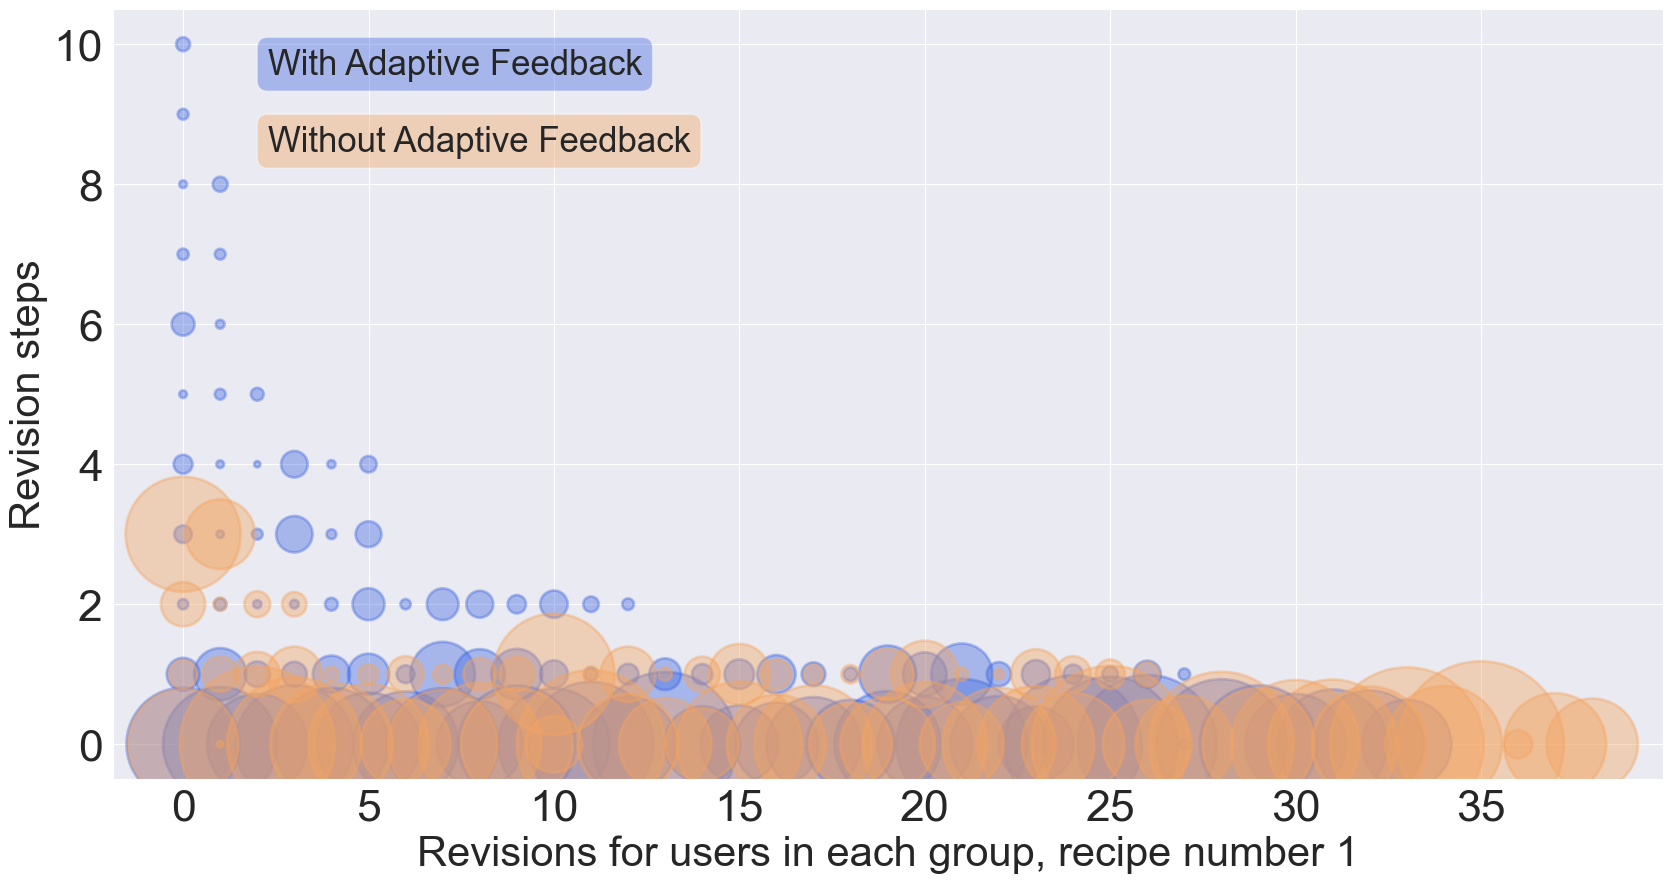

In [35]:
def bubble_plot(recipe_num, show_data=False, vertical=False): 
    if vertical:
        fig, ax = plt.subplots(figsize=(10,10), sharex=True, sharey=True)
    else :
        fig, ax = plt.subplots(figsize=(20,10), sharex=True, sharey=True)
    group_characteristics = ["With Adaptive Feedback", "Without Adaptive Feedback"]
    for group in [1,2,3,4]:
        data = []
        for i, _ in enumerate(sorted_users):
            if i in utils.INDICES[group-1]:
                try: 
                    dfr = get_data_per_session(i)[recipe_num]
                    dfr.reset_index(inplace=True)
                    data.append(dfr)
                except: 
                        data.append(pd.DataFrame())

        data = (sorted(data, key = lambda dfr: len(dfr), reverse=True))
        list_of_df = [df for df in data]
        dframes = pd.concat(list_of_df)

        y = [[i]*len(list_of_df[i]) for i in range(len(list_of_df))]
        x = [np.arange(len(y_i)) for y_i in y ]
        x = [index for sub in x for index in sub]
        y = [i for sub in y for i in sub]

        ins = (dframes['insertions'].values)
        delete = (dframes['deletions'].values)
        revisions = ((ins + delete)*5).tolist()

        if not vertical:
            ax.scatter(x=y, y=x, s=revisions, alpha=0.4, linewidths=2, label=group_characteristics[group-1], c='royalblue' if group == 1 else 'sandybrown')
            plt.xlabel(xlabel='Revisions for users in each group, recipe number {num}'.format(num=recipe_num+1), fontsize=30)
            plt.ylabel(ylabel='Revision steps', fontsize=30)
        else : 
            ax.scatter(x=x, y=y, s=revisions, alpha=0.4, linewidths=2, label=group_characteristics[group-1], c='royalblue' if group == 1 else 'sandybrown')
            plt.xlabel(xlabel='Revision steps', fontsize=30)
            plt.ylabel(ylabel='Revisions for users in each group, recipe number {num}'.format(num=recipe_num+1), fontsize=30)
        # place a text box  in upper left in axes coords
        if show_data:
            text = compute_text_for_bubble_plots(group_num=group, recipe_num=recipe_num)
            props = dict(boxstyle='round', facecolor='w', alpha=0.8)
            ax.text(0.6 if group==1 else 0.8, 0.95, text, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=props)

        new_props = dict(boxstyle='round', facecolor='royalblue' if group == 1 else 'sandybrown', alpha=0.4)
        ax.text(0.1, 0.95 if group == 1 else 0.85, group_characteristics[group-1], transform=ax.transAxes, fontsize=25,
            verticalalignment='top', bbox=new_props)

    fig.tight_layout()
    plt.savefig('results/bubble plots/recipe {num}.png'.format(num=recipe_num+1))
bubble_plot(recipe_num=0)
bubble_plot(recipe_num=1)
bubble_plot(recipe_num=2)

In [36]:
utils.INDICES

[[0,
  2,
  4,
  7,
  10,
  17,
  18,
  20,
  22,
  23,
  24,
  25,
  26,
  27,
  29,
  30,
  31,
  32,
  34,
  35,
  36,
  37,
  41,
  43,
  44,
  50,
  52,
  62,
  64,
  66,
  67,
  68,
  69,
  72],
 [1,
  3,
  5,
  6,
  8,
  9,
  11,
  12,
  13,
  14,
  15,
  16,
  19,
  21,
  28,
  33,
  38,
  39,
  40,
  42,
  45,
  46,
  47,
  48,
  49,
  51,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  63,
  65,
  70,
  71]]

[(0.8216228818004919, 0.6898769466620385, 0.553089419751563), (0.6457639821770182, 0.4211892839493731, 0.5247783164297652)]


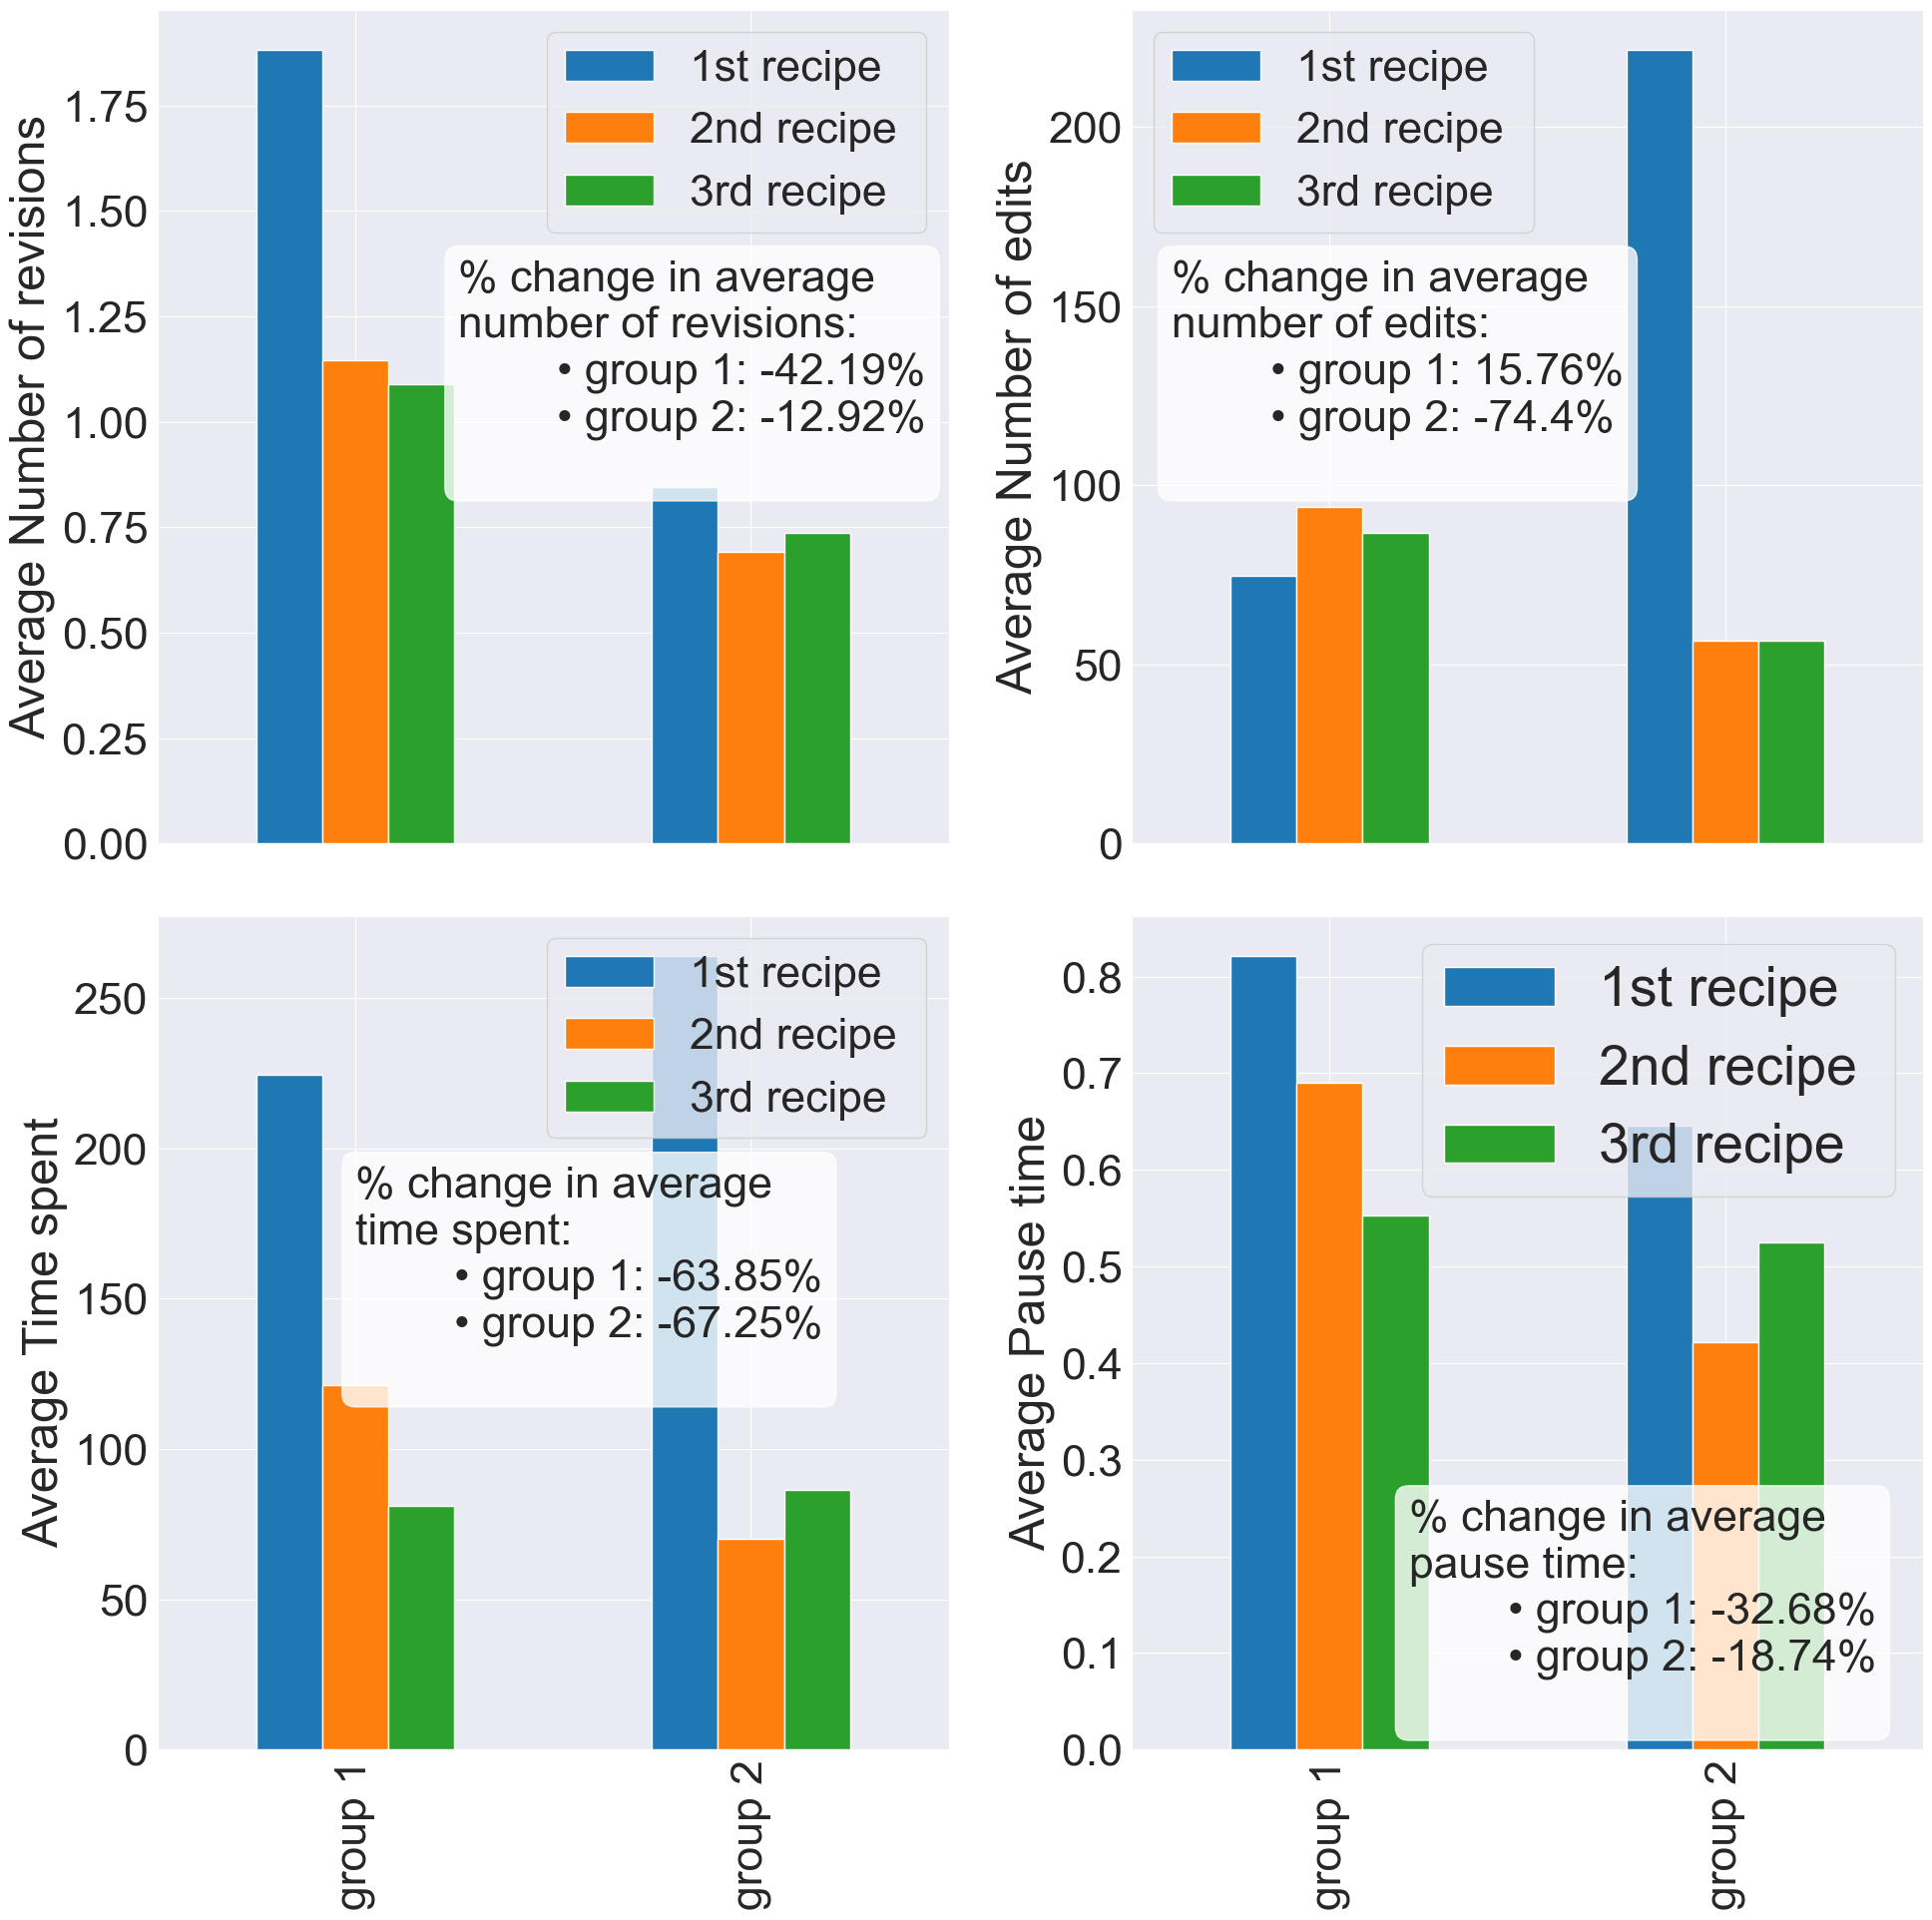

In [21]:
_, means_1, _, avr_rev_lengths_1, _, _ = data_computation_on_groups(0, utils.INDICES)
_, means_2, _, avr_rev_lengths_2 ,_ , _ = data_computation_on_groups(1, utils.INDICES)
_, means_3 , _, avr_rev_lengths_3, _ , _ = data_computation_on_groups(2, utils.INDICES)
time_spent = []
pause_times = []
for group_num in [1,2]:
        time, pause_time = [], []
        for recipe_num in range(0,3):
                time.append(get_average_time_spent_per_group(group_num=group_num, recipe_num=recipe_num))
                pause_time.append(get_average_pause_time_for_group(group_num=group_num, recipe_num=recipe_num))
        
        time_spent.append(tuple(time))
        pause_times.append(tuple(pause_time))

print(pause_times)
means = pd.DataFrame((zip(means_1, means_2, means_3)), columns=['1st recipe', '2nd recipe ', '3rd recipe'], index=['group 1', 'group 2'])
avr_rev_lengths = pd.DataFrame((zip(avr_rev_lengths_1, avr_rev_lengths_2, avr_rev_lengths_3)), columns=['1st recipe', '2nd recipe ', '3rd recipe'], index=['group 1', 'group 2'])
time_spent = pd.DataFrame(time_spent, columns=['1st recipe', '2nd recipe ', '3rd recipe'], index=['group 1', 'group 2'])
pause_times = pd.DataFrame(pause_times, columns=['1st recipe', '2nd recipe ', '3rd recipe'], index=['group 1', 'group 2'])

fig, ax = plt.subplots(2, 2, sharex=True)

figsize = (20,20)

ax[0][0].set_ylabel('Average Number of revisions', fontsize=35)
ax[0][1].set_ylabel('Average Number of edits', fontsize=35)
ax[1][0].set_ylabel('Average Time spent', fontsize=35)
ax[1][1].set_ylabel('Average Pause time', fontsize=35)
means.plot(kind='bar', figsize=figsize, ax=ax[0][0])
avr_rev_lengths.plot(kind='bar', figsize=figsize, ax=ax[0][1])
time_spent.plot(kind='bar', figsize=figsize, ax=ax[1][0])
pause_times.plot(kind='bar', figsize=figsize, ax=ax[1][1])
fig.tight_layout()

props = dict(boxstyle='round', facecolor='w', alpha=0.8)
ax[0][0].text(0.38, 0.7, utils.compute_text('average\nnumber of revisions:', means), transform=ax[0][0].transAxes, fontsize=32,
        verticalalignment='top', bbox=props)
ax[0][1].text(0.05, 0.7, utils.compute_text('average\nnumber of edits:', avr_rev_lengths), transform=ax[0][1].transAxes, fontsize=32,
        verticalalignment='top', bbox=props)
ax[1][0].text(0.25, 0.7, utils.compute_text('average \ntime spent:', time_spent), transform=ax[1][0].transAxes, fontsize=32,
        verticalalignment='top', bbox=props)
ax[1][1].text(0.35, 0.3, utils.compute_text('average \npause time:', pause_times), transform=ax[1][1].transAxes, fontsize=32,
        verticalalignment='top', bbox=props)
plt.legend(fontsize=40)

plt.savefig('results/summary.png')

In [22]:
dframe_with_n_recipes = []
dframe_all_recipes_combined = []
for group in [1,2]:
    for user in utils.INDICES[group-1]:
        time_spent = get_time_spent_for_user(user, recipe_num=0)
        num_revisions = 0
        total_edits = 0
        for i , session in enumerate(get_data_per_session(user)):
            session = session.values
            for revision in session[1:]:
                num_revisions += 1
                edits = revision[0] + revision[1]
                total_edits += edits
                dframe_with_n_recipes.append({'user_id': user, 'revisions': edits, 'group': group, 'recipe number': i+1, 'time spent revising (seconds)': time_spent})
        dframe_all_recipes_combined.append({'user_id': user, 'revisions': total_edits, 'group': group, 'number of revisions': num_revisions, 'time spent revising (seconds)': time_spent})

dframe_with_n_recipes = pd.DataFrame(dframe_with_n_recipes)
dframe_all_recipes_combined = pd.DataFrame(dframe_all_recipes_combined)

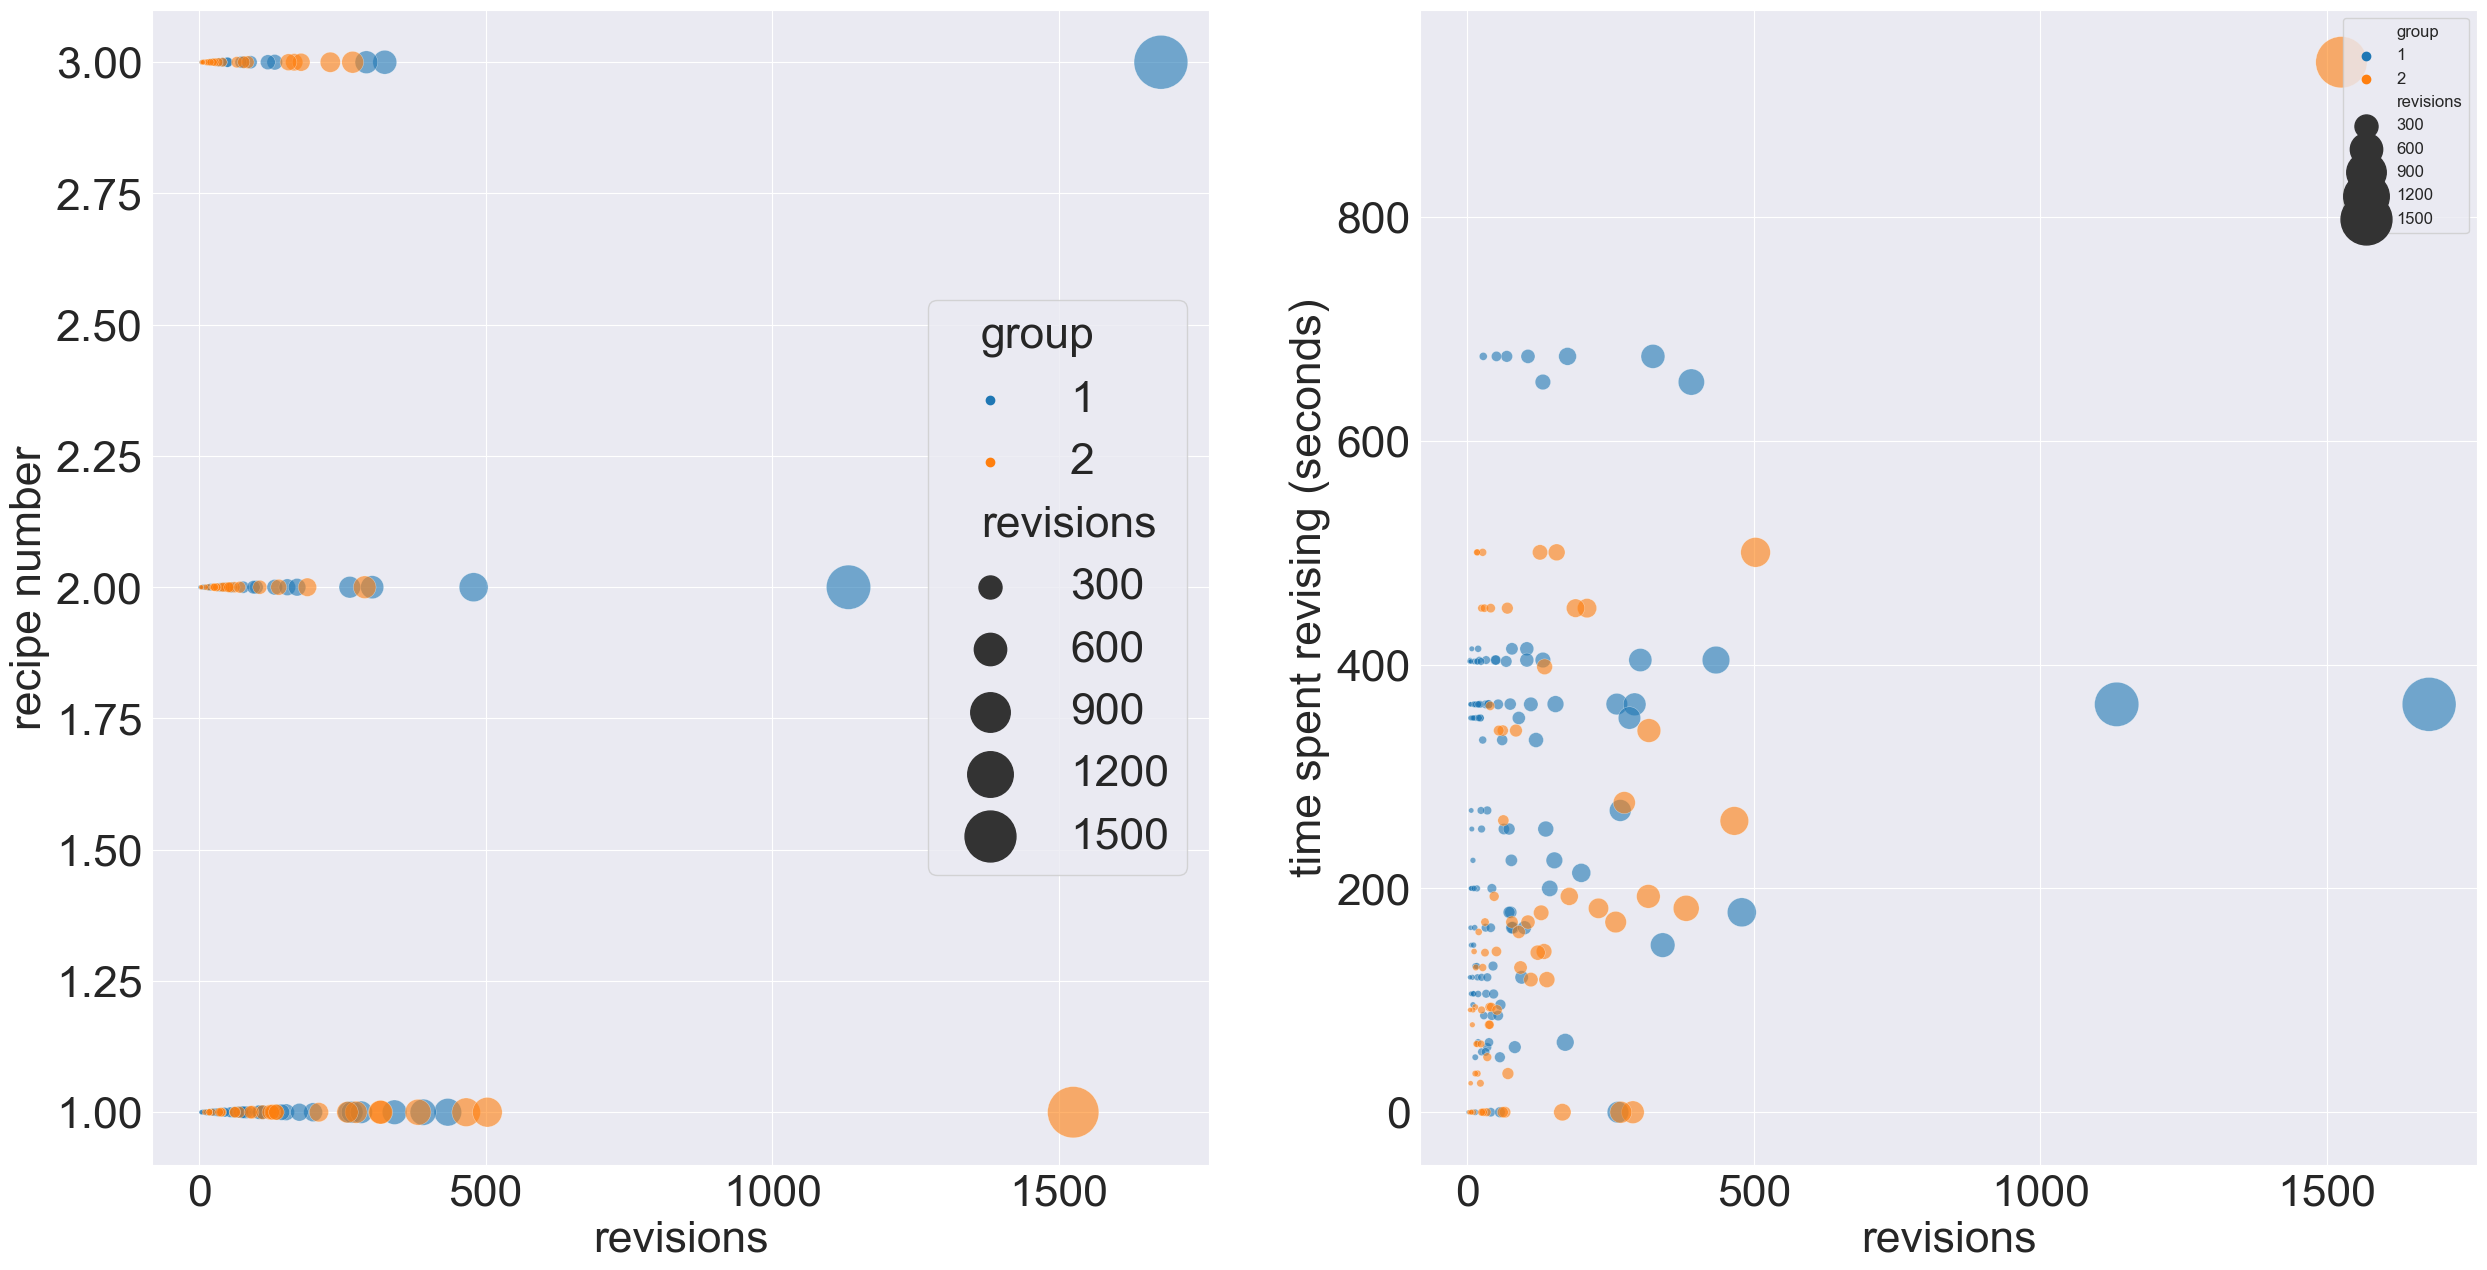

In [23]:
fig,ax = plt.subplots(1,2, figsize=(30,15))
without_outliers = dframe_with_n_recipes[(dframe_with_n_recipes["time spent revising (seconds)"] <= 1000) & (dframe_with_n_recipes["recipe number"] <= 3)]
sns.scatterplot(data=without_outliers, x="revisions", y="recipe number", size="revisions", hue="group", palette='tab10', alpha=0.6, sizes=(10, 1500), ax=ax[0])
sns.scatterplot(data=without_outliers, x="revisions", y="time spent revising (seconds)", size="revisions", hue="group", palette='tab10', alpha=0.6, sizes=(10, 1500), ax=ax[1])
plt.legend(fontsize=12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


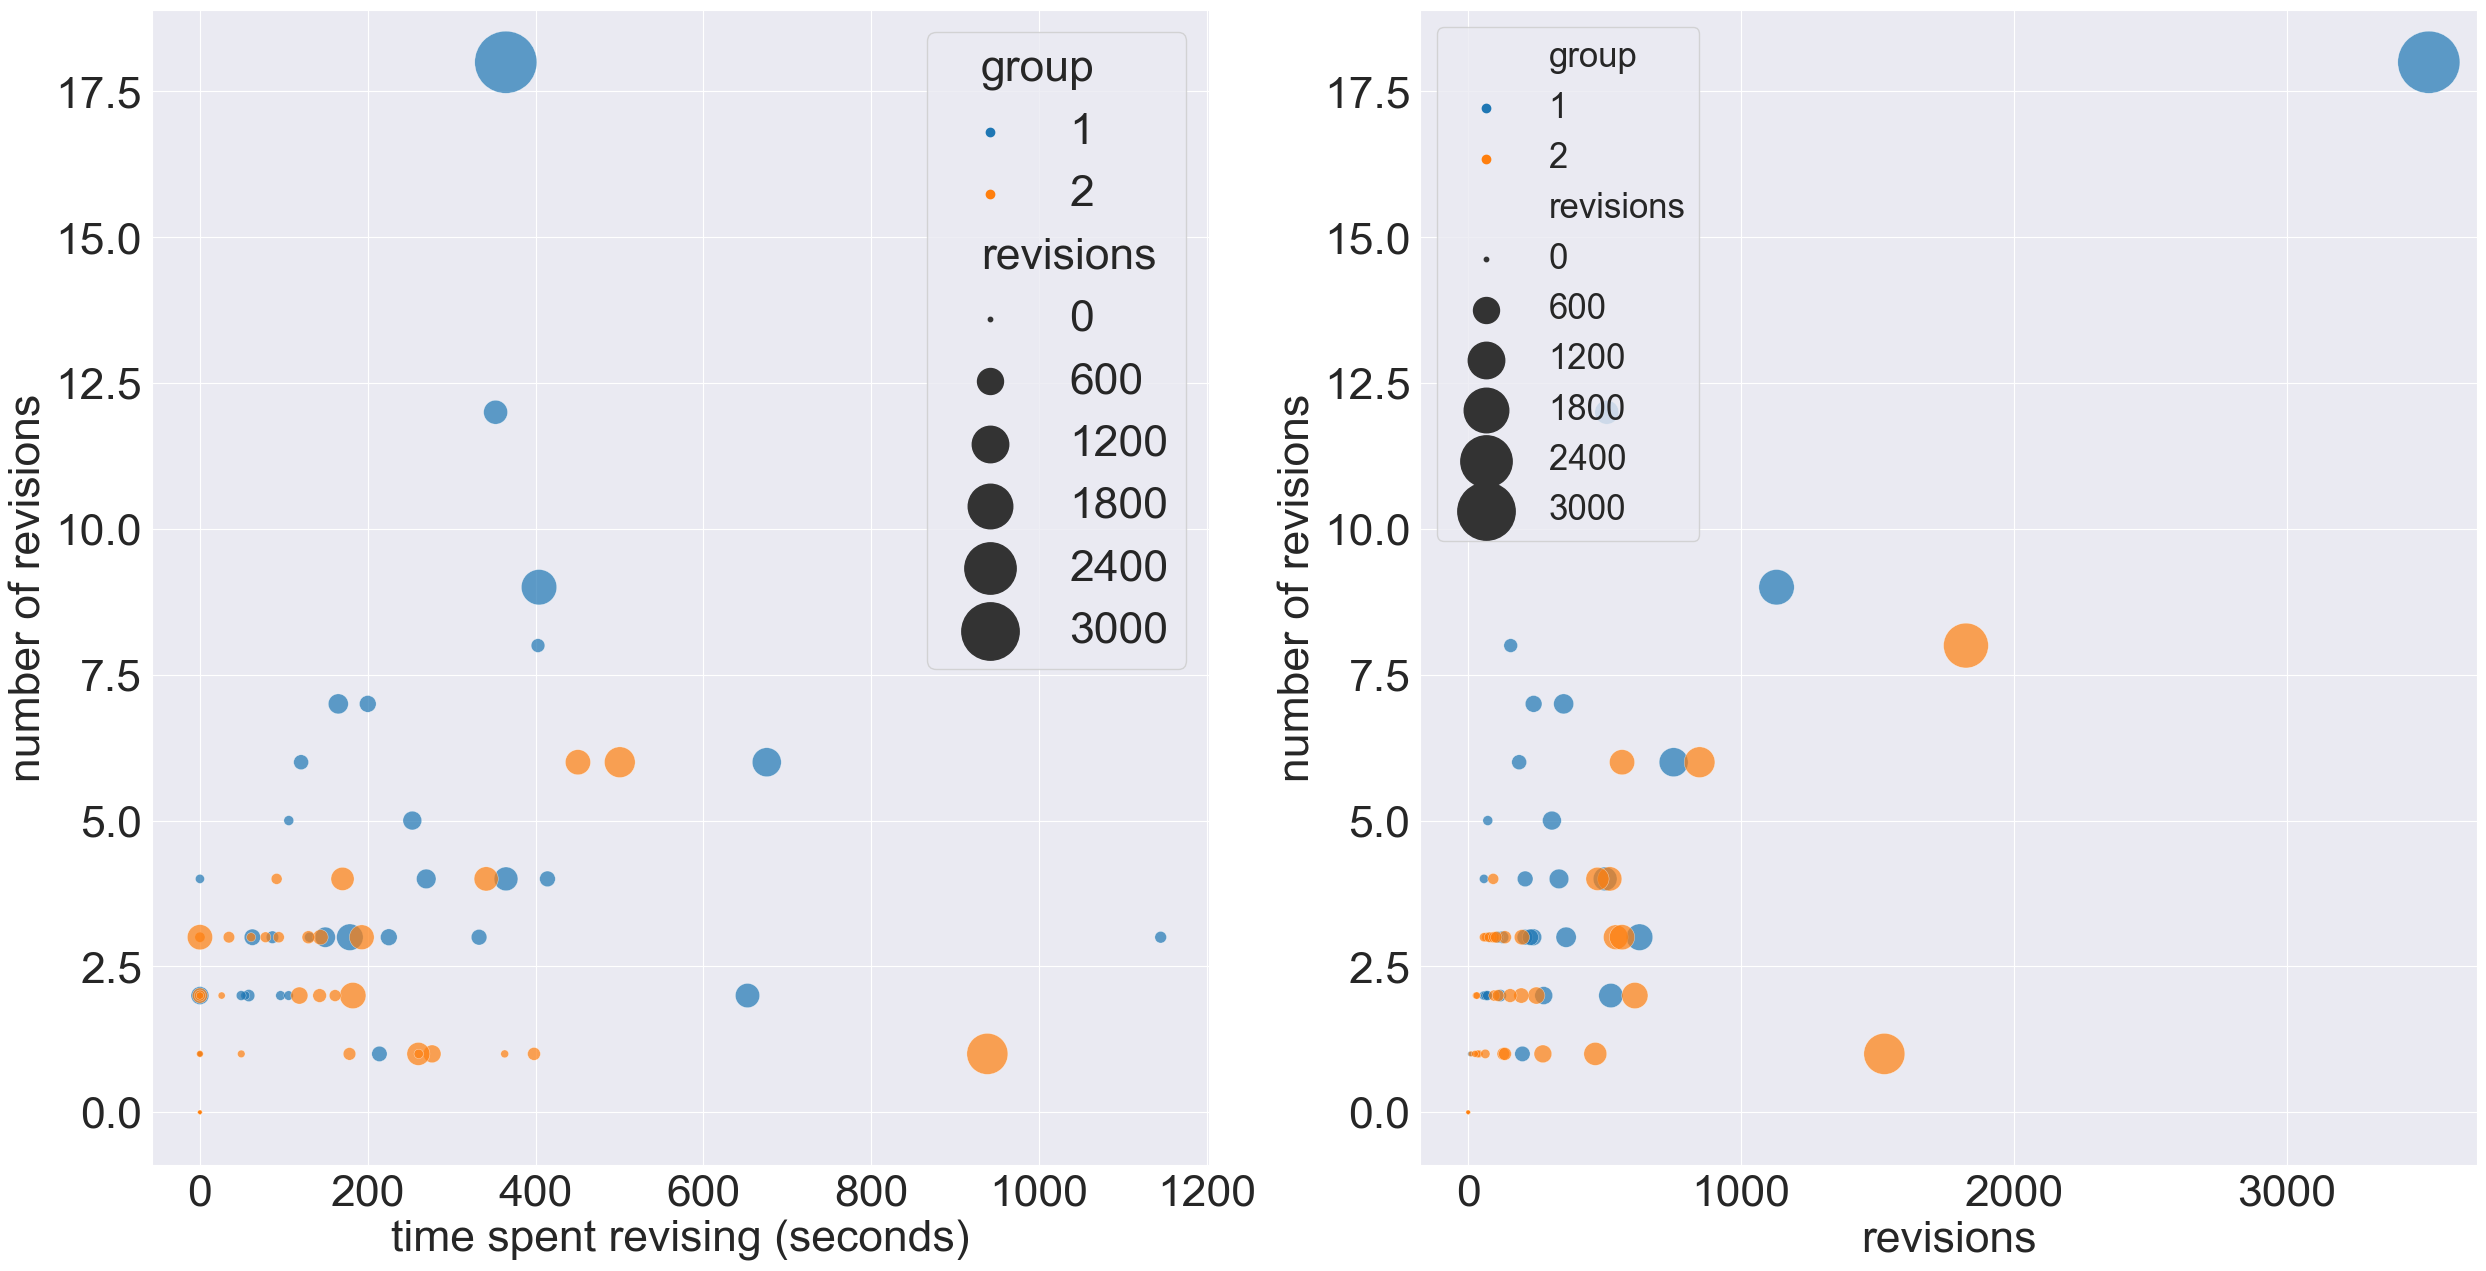

In [24]:
fig,ax = plt.subplots(1,2, figsize=(30,15))
sns.scatterplot(data=dframe_all_recipes_combined[dframe_all_recipes_combined['time spent revising (seconds)'] < 1500], x="time spent revising (seconds)", y="number of revisions", size="revisions", hue="group", palette='tab10', alpha=0.7, sizes=(10, 2000), ax=ax[0])
plt.legend(loc='upper left', fontsize=12)
sns.scatterplot(data=dframe_all_recipes_combined, x="revisions", y="number of revisions", size="revisions", hue="group", palette='tab10', alpha=0.7, sizes=(10, 2000), ax=ax[1])
plt.legend(loc='upper left', fontsize=25)

<AxesSubplot:xlabel='revisions', ylabel='Count'>

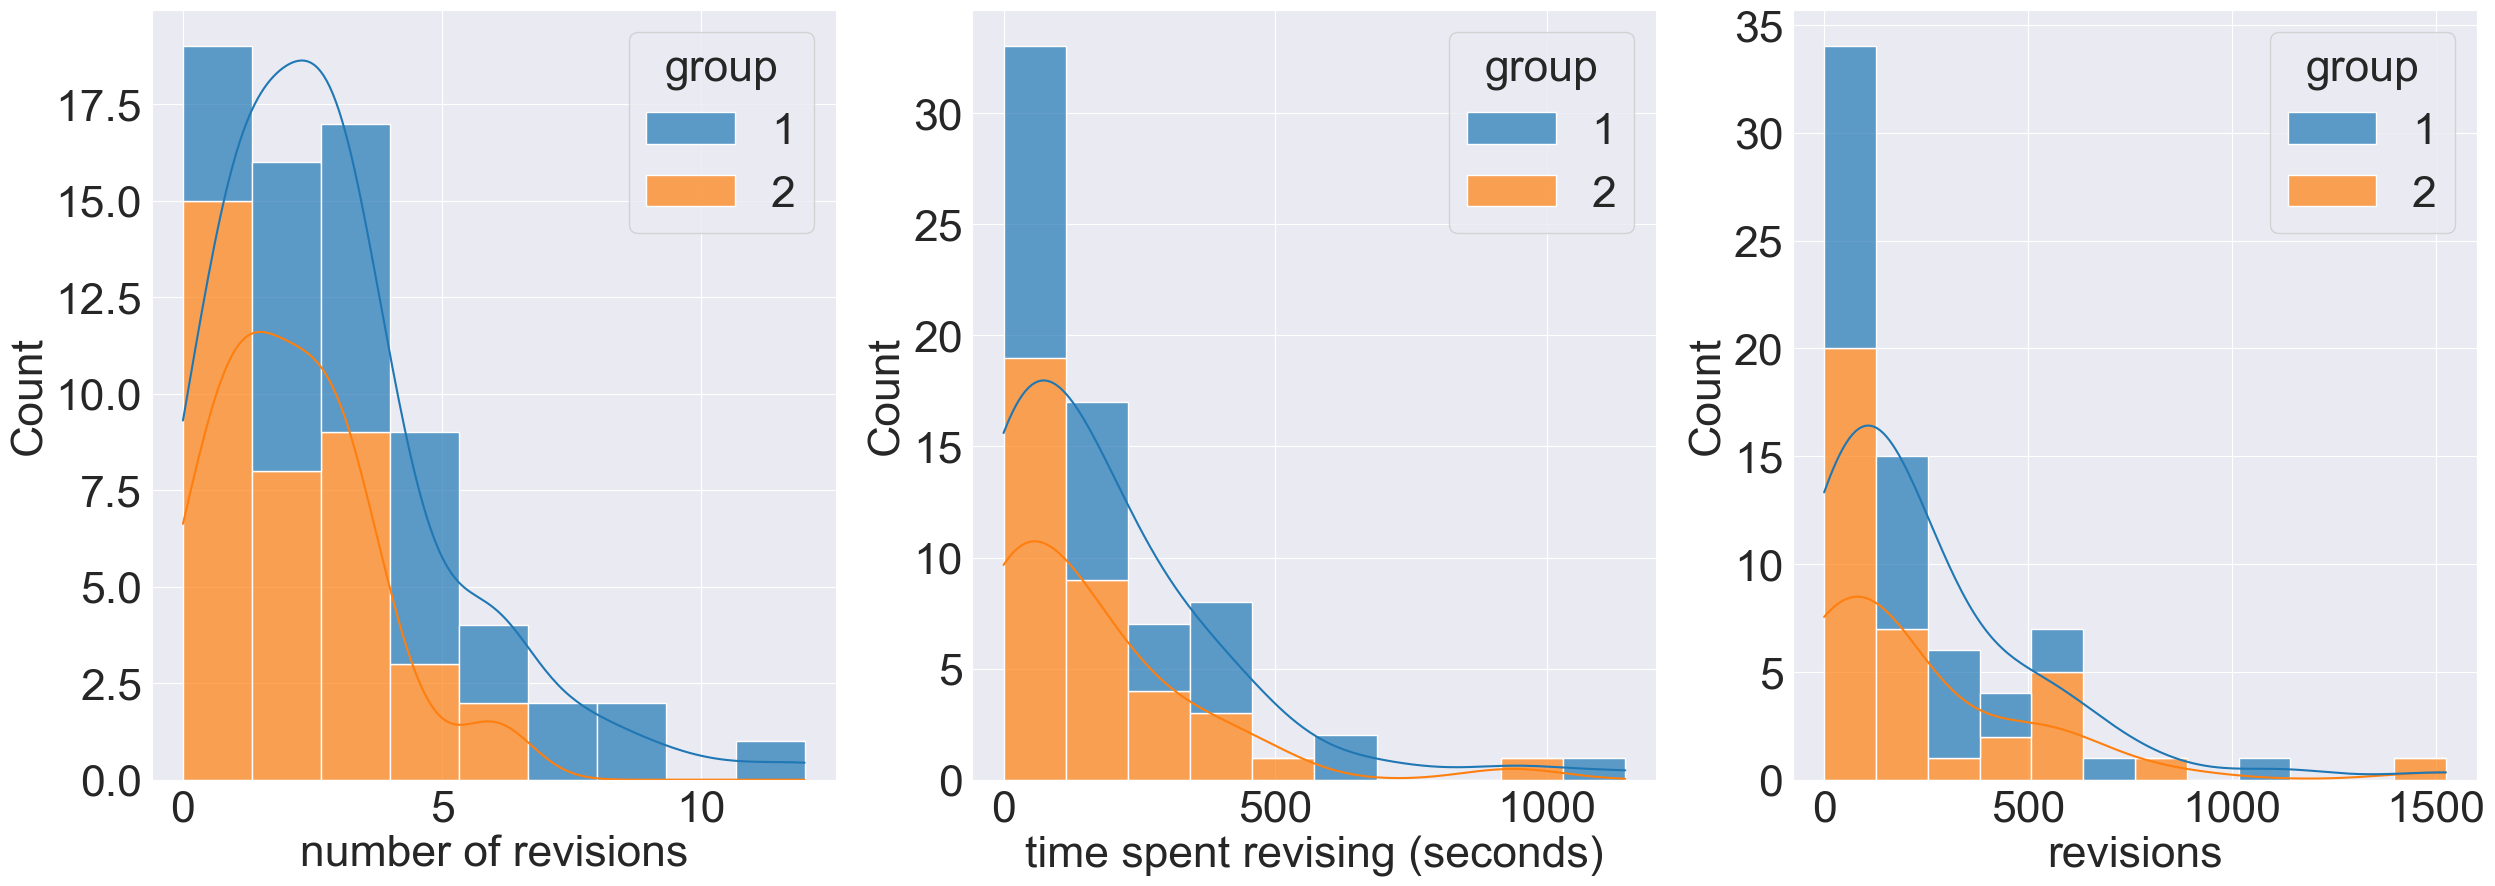

In [25]:
without_outliers = dframe_all_recipes_combined[(dframe_all_recipes_combined["time spent revising (seconds)"] <= 1500) & (dframe_all_recipes_combined["revisions"] <= 3000)]
fig,ax = plt.subplots(1,3, figsize=(30,10))
sns.histplot(data=without_outliers, x="number of revisions", hue="group", palette='tab10', alpha=0.7, multiple='stack', ax=ax[0], kde=True)
sns.histplot(data=without_outliers, x="time spent revising (seconds)", hue="group", palette='tab10', alpha=0.7, multiple='stack', ax=ax[1], kde=True)
sns.histplot(data=without_outliers, x="revisions", hue="group", palette='tab10', alpha=0.7, multiple='stack', ax=ax[2], kde=True)

## Comparing users inside a group

What we can do is find useful data for each user in a group ie:
* number of times they revised
* total time spent on the platform
* total number of revisions when revising 

In [26]:
from src.scripts.keystrokefeatures import ks_features

Loading utils
Done loading


In [27]:
gender_data = utils.matching_data['gender']
def get_features_for_group(group_number):
    #create an array as long as the number of indices in the group
    number_of_times_revised = [0] * len(utils.INDICES[group_number-1])
    time_spent = [0] * len(utils.INDICES[group_number-1])
    total_edits = [0] * len(utils.INDICES[group_number-1])
    gender = [0] * len(utils.INDICES[group_number-1])

    for i, user in enumerate(utils.INDICES[group_number-1]):
        index_in_matching_data = np.where(utils.matching_data['user_id'] == sorted_users[user])[0][0]
        gender_num = gender_data.iloc[index_in_matching_data]
        if gender_num == 1 : gender[i] = 'female'
        elif gender_num == 2 : gender[i] = 'male'
        else: gender[i] = 'other'
        time_spent[i] = get_total_time_spent_for_user(user)
        total_num_edits = 0
        max_times_revised = 0
        try:
            data = get_data_per_session(user)
        except: continue
        for session in data:
            if len(session) > 1:
                revision_sessions = session[1:]
                session_len = len(revision_sessions)
                max_times_revised = session_len if session_len > max_times_revised else max_times_revised
                for s in revision_sessions.values:
                    total_num_edits += s[0] + s[1]
               
        total_edits[i] = total_num_edits
        number_of_times_revised[i] = max_times_revised

    users = [sorted_users[user] for user in utils.INDICES[group_number-1]]
    efficiencies = [ks_features[user]['efficiency'] for user in users]
    DIRatio = [ks_features[user]['DIRatio'] for user in users]
    
    result = pd.DataFrame([users, number_of_times_revised, time_spent, total_edits, gender, efficiencies, DIRatio]).T
    result.reset_index(inplace=True)
    result.columns = ['index', 'users', 'number of times revised', 'time spent', 'total edits', 'gender', 'efficiency', 'DIRatio']
    
    return result


In [28]:
dfr = get_features_for_group(1)
efficiencies = {}
male_efficiency = dfr[((dfr['gender']== 'male'))]['efficiency']
female_efficiency = dfr[(dfr['gender']== 'female') ]['efficiency']

efficiencies['G1 gender efficieny p value'] = ttest_ind(female_efficiency, male_efficiency)[1]
ttest_ind(female_efficiency, male_efficiency)[1]

dfr = get_features_for_group(2)
male_efficiency = dfr[((dfr['gender']== 'male'))]['efficiency']
female_efficiency = dfr[(dfr['gender']== 'female') ]['efficiency']
efficiencies['G2 gender efficieny p value'] = ttest_ind(female_efficiency, male_efficiency)[1]
print("efficiencies comparing males and females in both groups: {eff}".format(eff=efficiencies))

efficiencies comparing males and females in both groups: {'G1 gender efficieny p value': 0.21522734075534067, 'G2 gender efficieny p value': 0.0037849374773471236}


In [29]:
dfr = get_features_for_group(1)
diratios = {}
male_diratio = dfr[((dfr['gender']== 'male'))]['DIRatio']
female_diratio = dfr[(dfr['gender']== 'female') ]['DIRatio']

diratios['G1 DIratio score p value'] = ttest_ind(female_diratio, male_diratio)[1]
ttest_ind(female_diratio, male_diratio)[1]

dfr = get_features_for_group(2)
male_diratio = dfr[((dfr['gender']== 'male'))]['DIRatio']
female_diratio = dfr[(dfr['gender']== 'female')]['DIRatio']
diratios['G2 DIratio score p value'] = ttest_ind(female_diratio, male_diratio)[1]
print("DIRatios comparing males and females in both groups: {ratios}".format(ratios=diratios))

DIRatios comparing males and females in both groups: {'G1 DIratio score p value': 0.38740997046369907, 'G2 DIratio score p value': 0.08814728805705424}


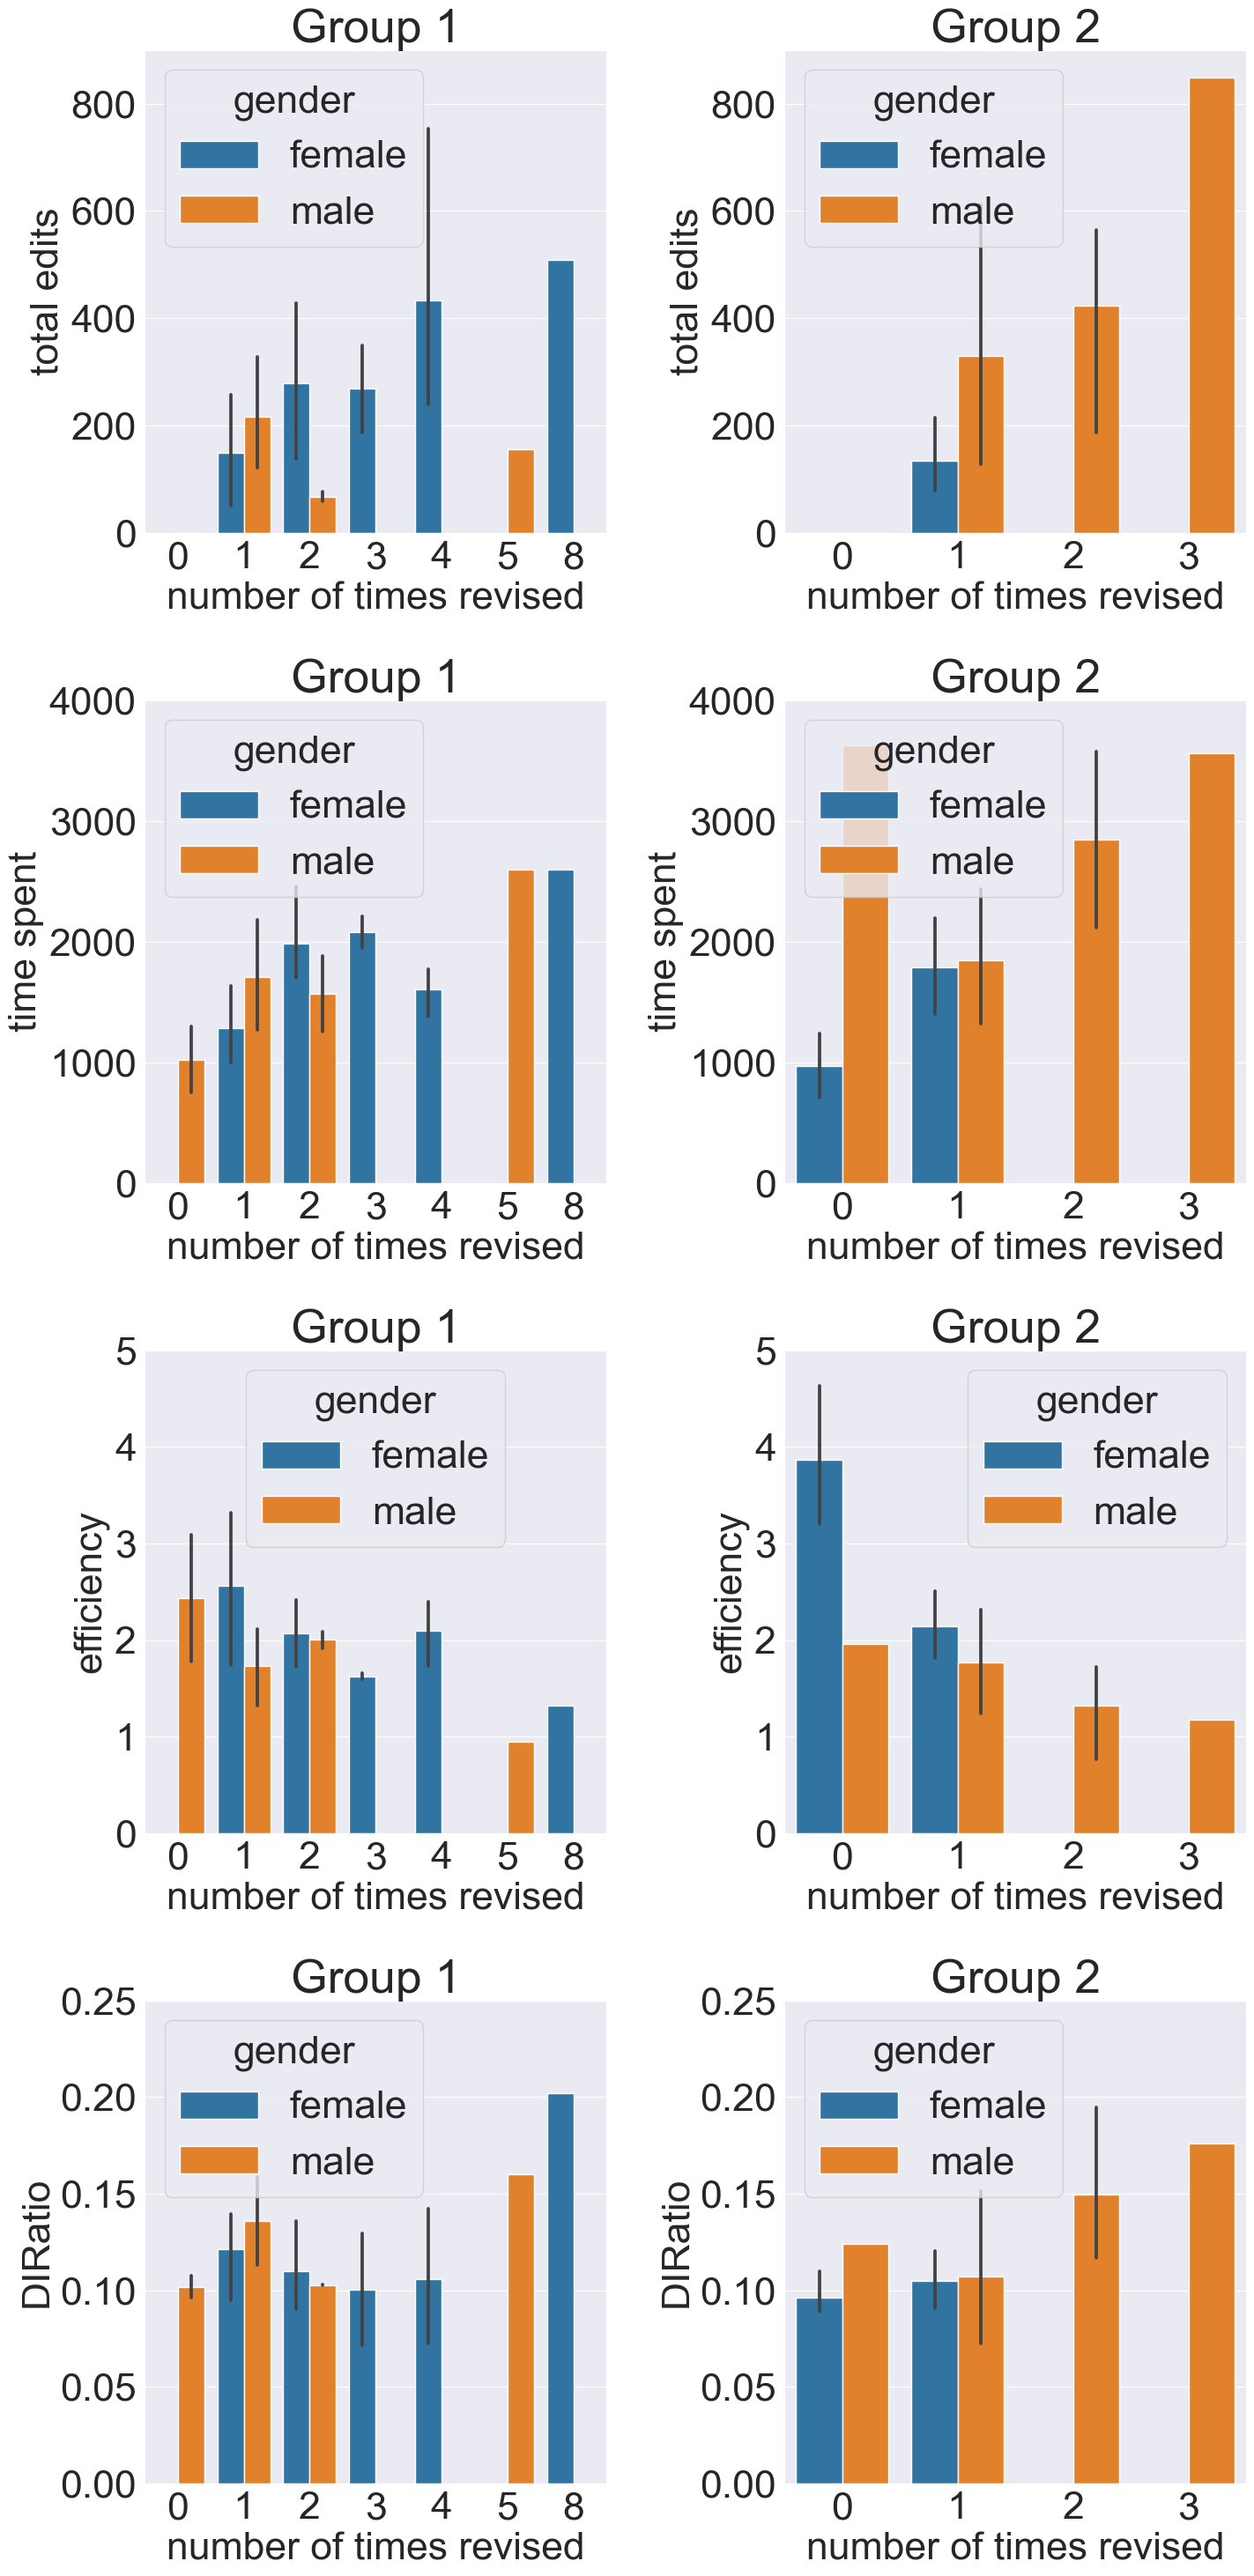

In [30]:
def gender_comparison_plot(vertical=False):
    num_rows = 4 if vertical else 2
    num_cols = 2 if vertical else 4
    x_size = 15 if vertical else 30
    y_size = 30 if vertical else 15
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(x_size, y_size))

    for i, group_number in enumerate([1,2]):    
            dfr = get_features_for_group(group_number=group_number)    
            dfr = dfr[(dfr['time spent'] < 10000) & (dfr['total edits'] < 1700) & ((dfr['gender'] != 'other'))]
    
            if not vertical:
                    sns.barplot(x=dfr['number of times revised'], y = dfr['DIRatio'] ,ax=ax[i][3], hue=dfr['gender']).set(title='Group {i}'.format(i=group_number))
                    sns.barplot(x=dfr['number of times revised'], y = dfr['total edits'] ,ax=ax[i][0], hue=dfr['gender']).set(title='Group {i}'.format(i=group_number))
                    sns.barplot(x=dfr['number of times revised'], y = dfr['time spent'] ,ax=ax[i][1], hue=dfr['gender']).set_title('Group {i}'.format(i=group_number))    
                    sns.barplot(x=dfr['number of times revised'], y = dfr['efficiency'] ,ax=ax[i][2], hue=dfr['gender']).set(title='Group {i}'.format(i=group_number))
            else:
                    sns.barplot(x=dfr['number of times revised'], y = dfr['total edits'] ,ax=ax[0][i], hue=dfr['gender']).set(title='Group {i}'.format(i=group_number))
                    sns.barplot(x=dfr['number of times revised'], y = dfr['time spent'] ,ax=ax[1][i], hue=dfr['gender']).set_title('Group {i}'.format(i=group_number))    
                    sns.barplot(x=dfr['number of times revised'], y = dfr['efficiency'] ,ax=ax[2][i], hue=dfr['gender']).set(title='Group {i}'.format(i=group_number))
                    sns.barplot(x=dfr['number of times revised'], y = dfr['DIRatio'] ,ax=ax[3][i], hue=dfr['gender']).set(title='Group {i}'.format(i=group_number))

    ylimits = [(0, 900),    (0, 4000),    (0, 5),    (0, 0.25)]
    for i in range(num_rows):
        for j in range(num_cols):
            ax[i][j].set_ylim(ylimits[i] if vertical else ylimits[j])
    plt.tight_layout()        
    plt.savefig('results/gender study/allgroups combined.png')
gender_comparison_plot(vertical=True)

Plotting individual features in case

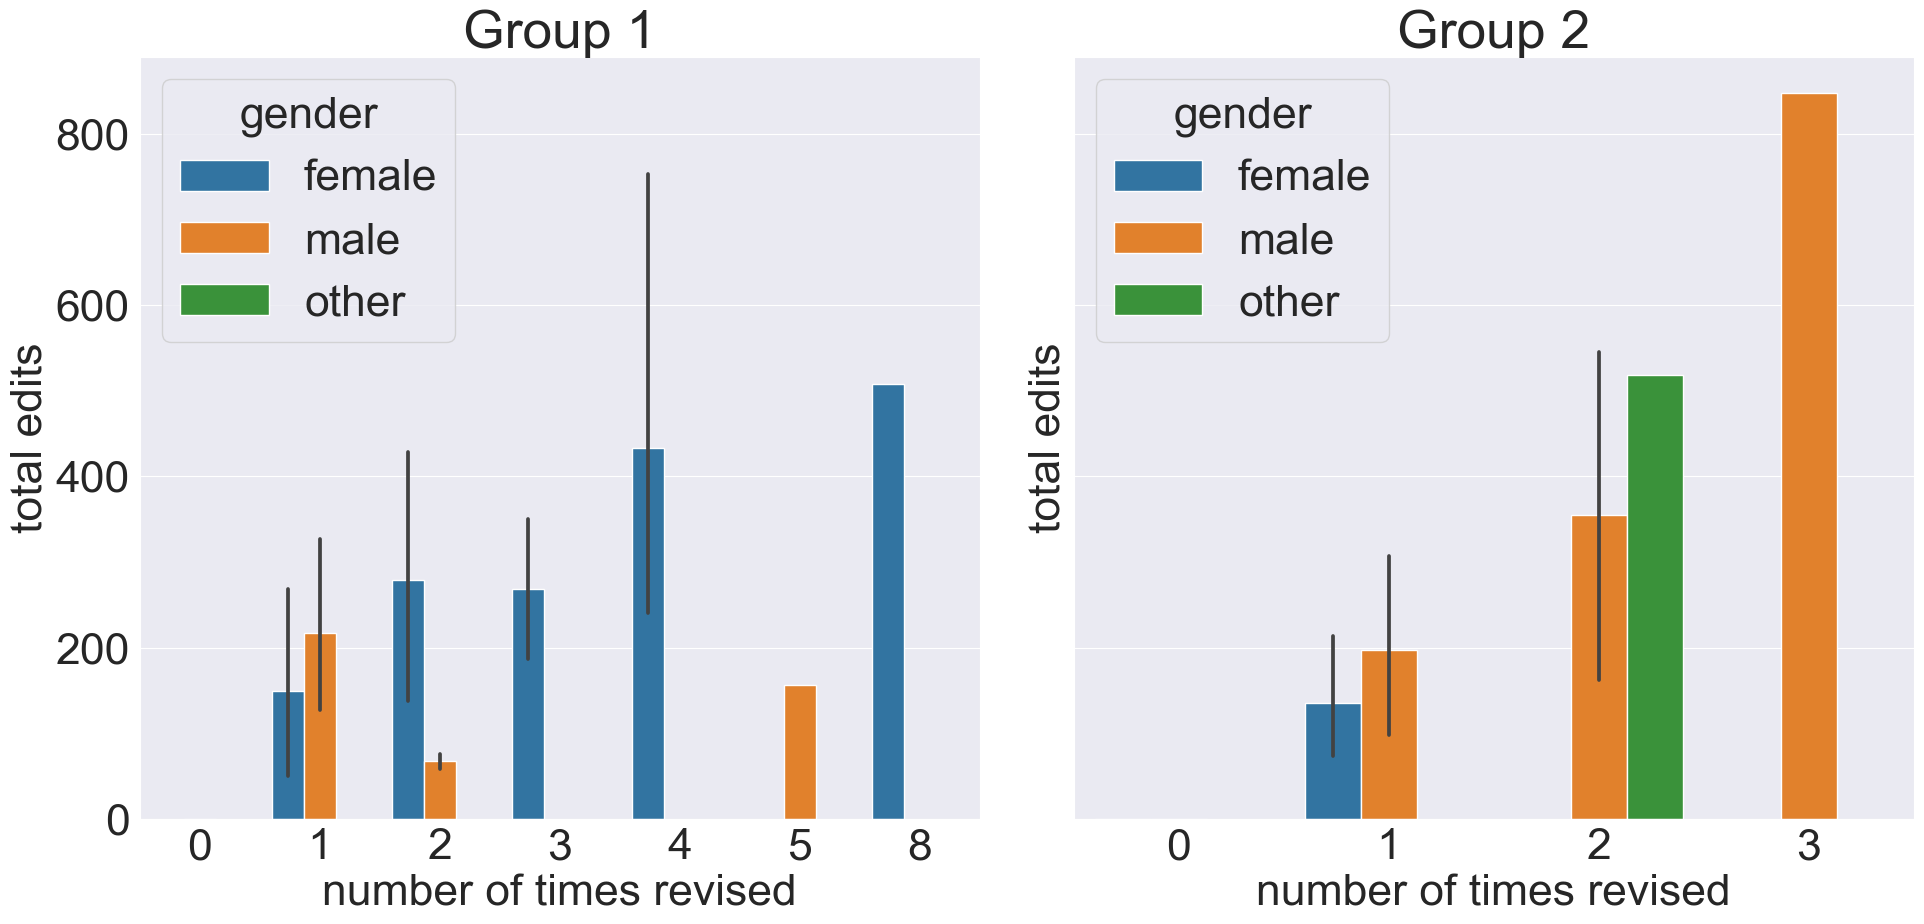

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
for group_number in [1,2]:
    dfr = get_features_for_group(group_number=group_number)  
    df_without_outliers=dfr[(dfr['total edits'] < 1000)]
    sns.barplot(x=df_without_outliers['number of times revised'], y = df_without_outliers['total edits'] ,ax=ax[group_number-1], hue=dfr['gender']).set(title='Group {i}'.format(i=group_number))
    plt.tight_layout()
    plt.savefig('results/gender study/num revisions plots.png')

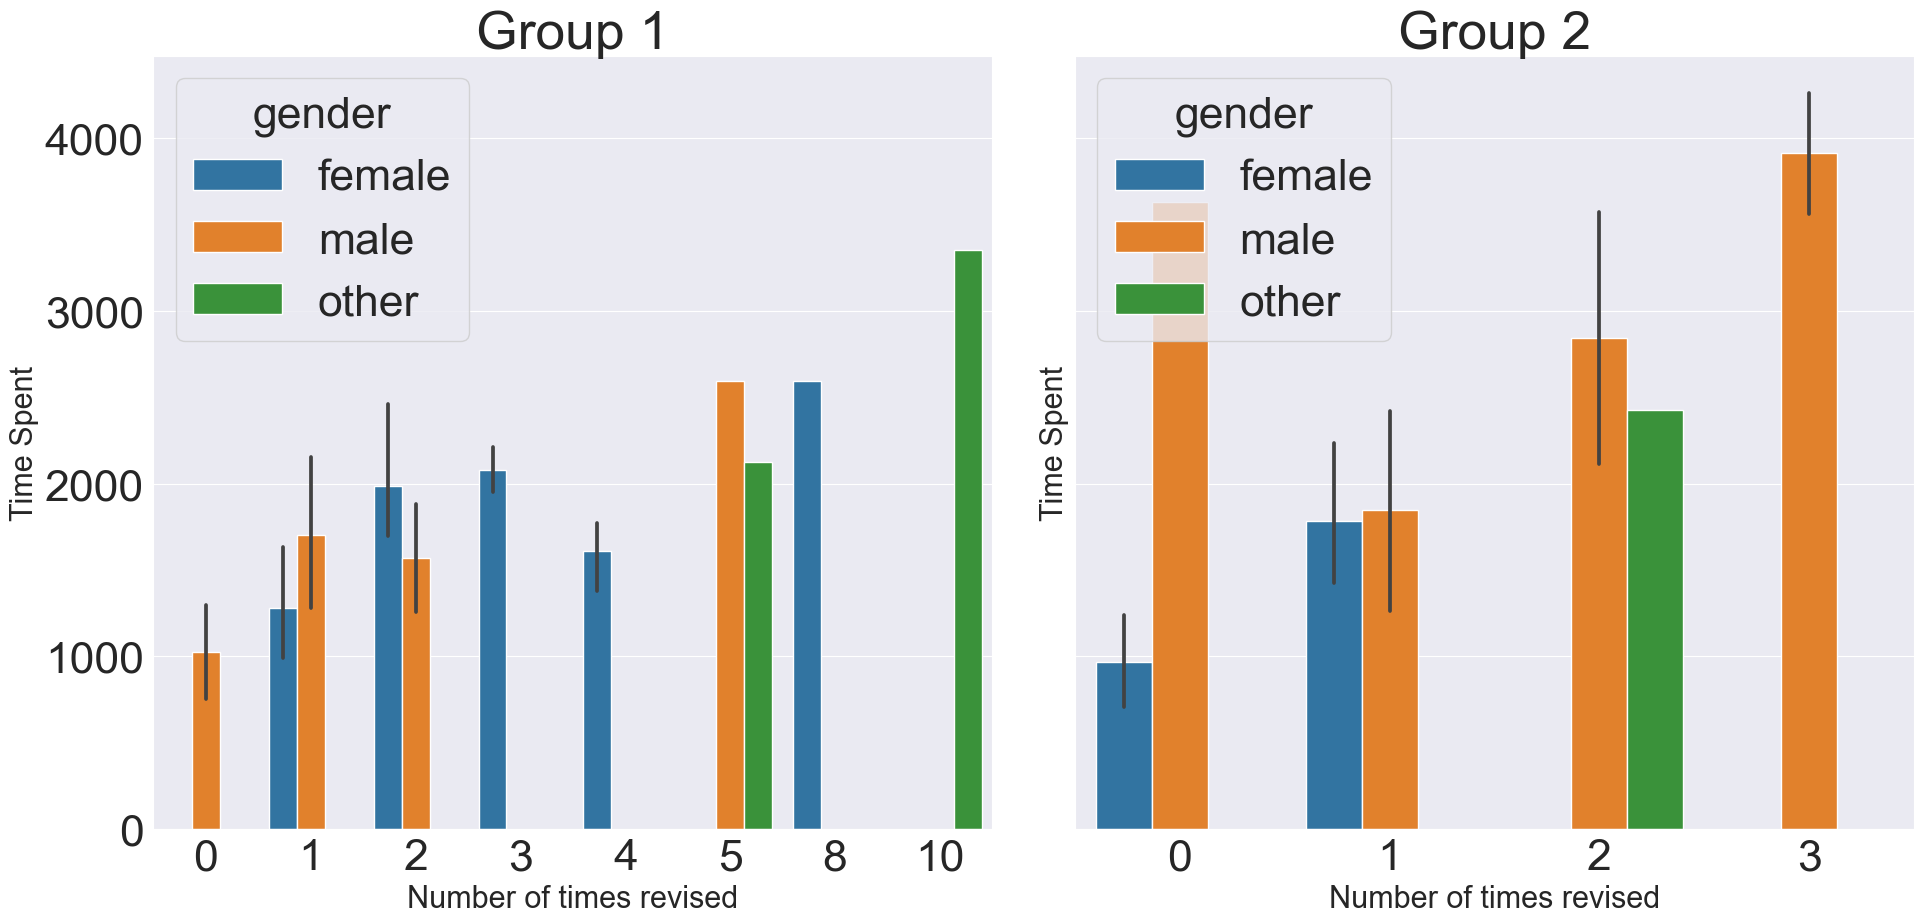

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

for group_number in [1,2]:
    dfr = get_features_for_group(group_number=group_number)  
    df_without_outliers=dfr[(dfr['time spent'] < 10000)]
    sns.barplot(x=df_without_outliers['number of times revised'], y = df_without_outliers['time spent'] ,ax=ax[group_number-1], hue=dfr['gender']).set(title='Group {i}'.format(i=group_number))
    xlabel = plt.gca().xaxis.label
    ax[0].set_xlabel('Number of times revised', fontsize=22)
    ax[1].set_xlabel('Number of times revised', fontsize=22)
    ax[0].set_ylabel('Time Spent', fontsize=22)
    ax[1].set_ylabel('Time Spent', fontsize=22)
    
    plt.tick_params(axis='y', labelsize=40)

    plt.tight_layout()
    plt.savefig('results/gender study/time spent plots.png')

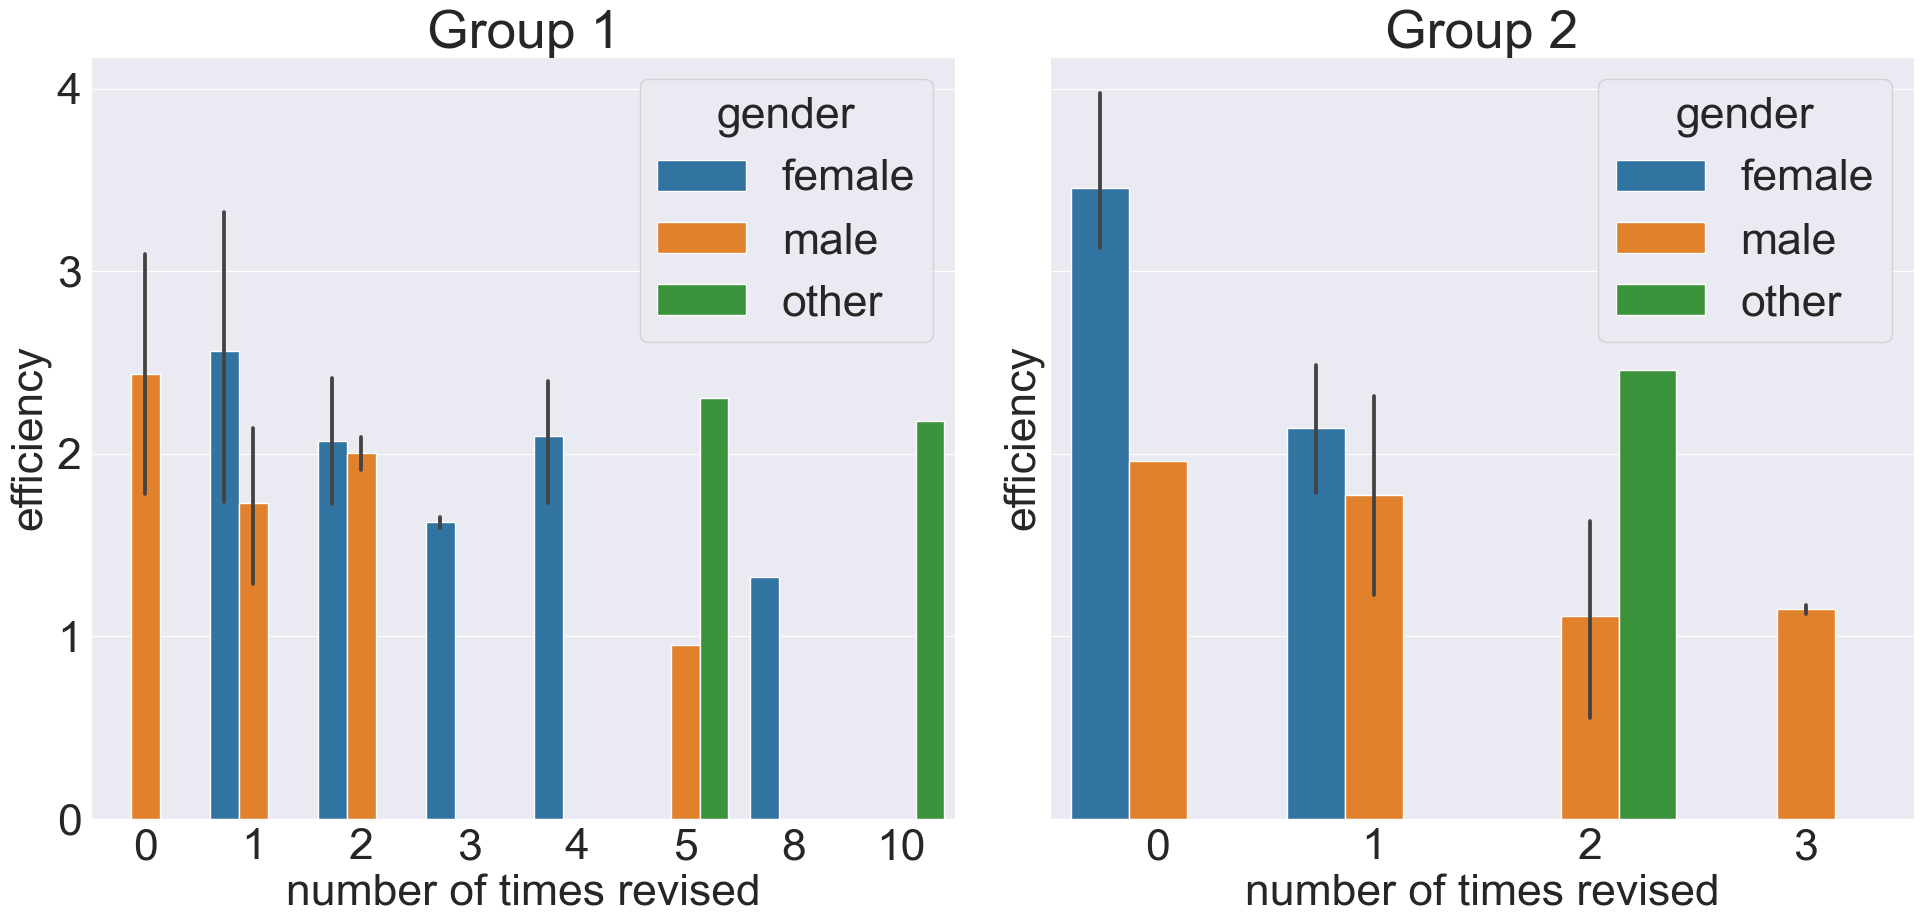

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
for group_number in [1,2]:
    dfr = get_features_for_group(group_number=group_number)  
    df_without_efficiency_outliers=dfr[(dfr['efficiency'] < 5) & (dfr['efficiency'] > 0.1)]
    sns.barplot(x=df_without_efficiency_outliers['number of times revised'], y = df_without_efficiency_outliers['efficiency'] ,ax=ax[group_number-1], hue=dfr['gender']).set(title='Group {i}'.format(i=group_number))
    plt.tight_layout()
    plt.savefig('results/gender study/efficiency plots.png')

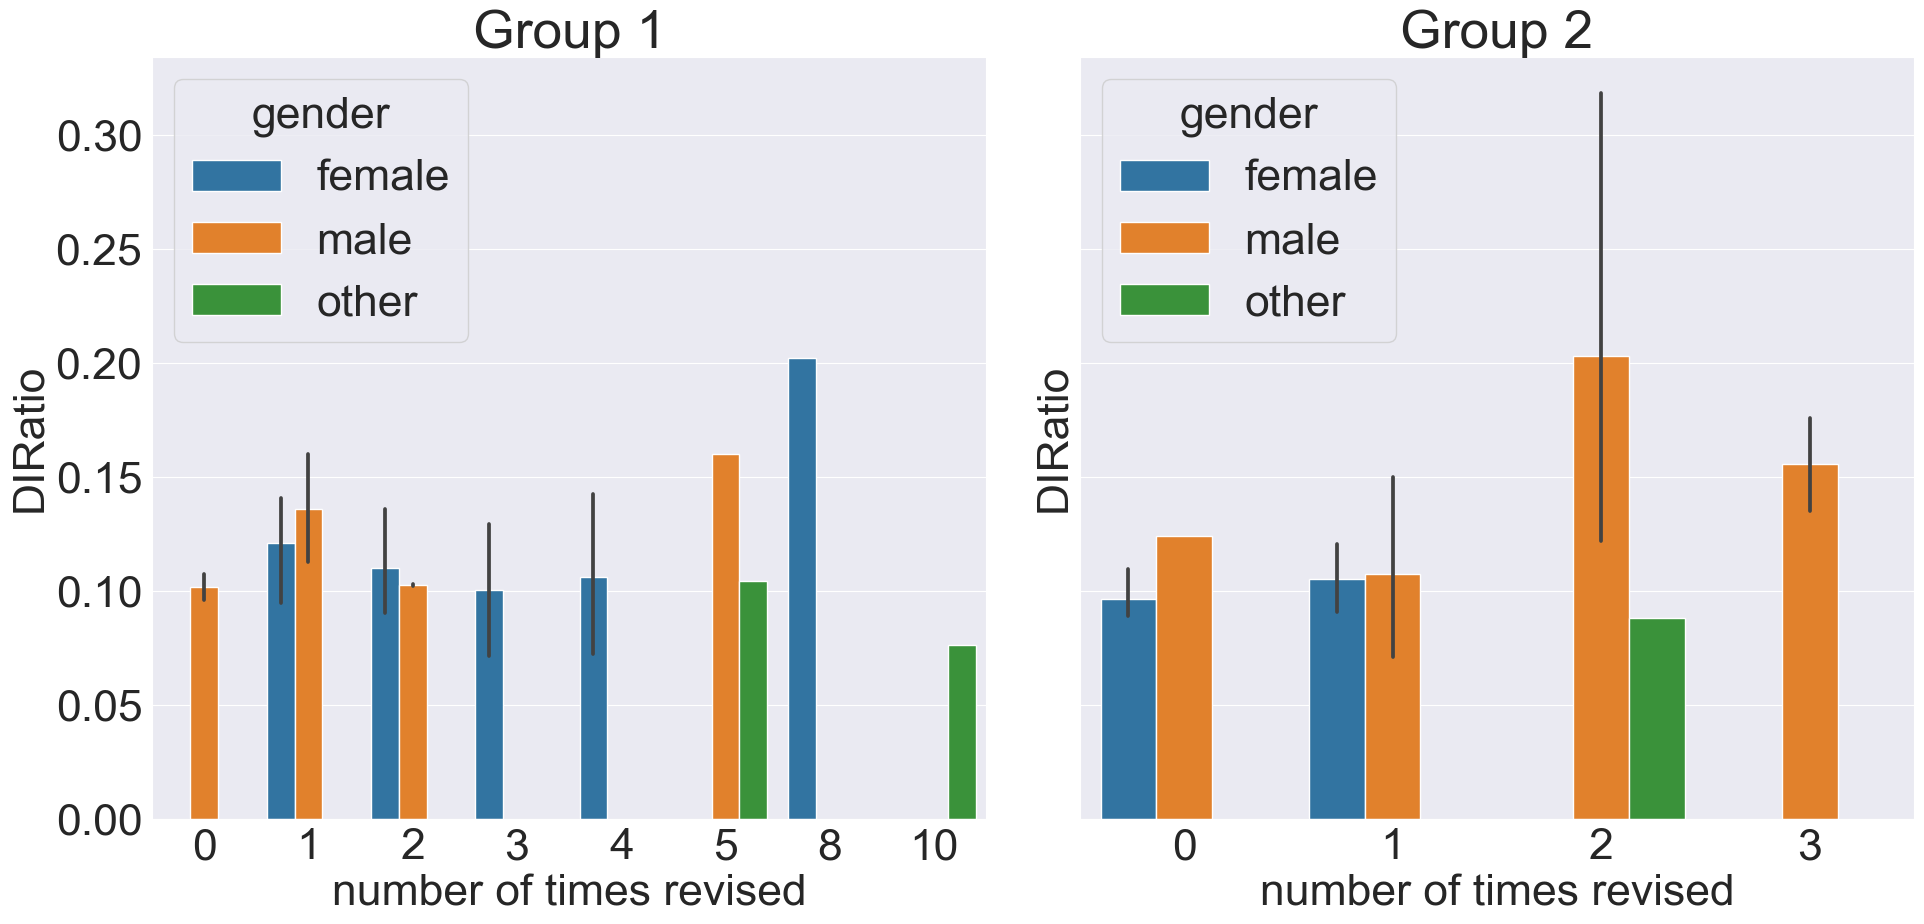

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
for group_number in [1,2]:
    dfr= get_features_for_group(group_number=group_number)  
    sns.barplot(x=dfr['number of times revised'], y = dfr['DIRatio'] ,ax=ax[group_number-1], hue=dfr['gender']).set(title='Group {i}'.format(i=group_number))
    plt.tight_layout()
    plt.savefig('results/gender study/DIRatio plots.png')